### Molecules

A copy of mBuilder, utilizing a data file, replaced AtomBuilder(AB) 
as the program's main version. AB is now in the additional notebooks 
folder alongside mBuilder as a history file. mbuilder carries on as 
the day-to-day working program intended to develop a 3D charge field 
model rendering of molecular matter selected by the user.  

Operating instructions. Start by clicking on the "Atom data" cell,
about 10 cells below. Next, from the toolbar's Cell dropdown selection 
menu choose "Run All Above". When the gui in the cell above "Atom data" 
becomes visible, make any changes to it or select an atom from the 
Periodic table. Next, with the gui or the Periodic table cell still
active, select "Run All Below" from the Cell dropdown menu. You'll then 
view the main program outputs from the tab enclosure cell near the 
bottom. For any changes, repeat - go back to the gui or Periodic 
table, make changes, then select "Run All Below". These instructions 
are repeated in the "Atom data" cell.

Molecules is intended to introduce Charge field theory - see the 
notebook's end cell's source references.                                          

#### Error using Pythreejs version 2.4.1. 
Update. 27 Nov 2022. 
For over a year this project received a UserWarning apparently due to non 
JSON compliant infinite values used in the pythreejs orbital camera. See, 
JSON serialization of OrbitControls fails with jupyter_client 7.0.3, opened 
22 Sep 21, https://github.com/jupyter-widgets/pythreejs/issues/366  Fixed 
by jupyter/jupyter_client#708. The UserWarning was unsightly, otherwise 
there was no impact on the program’s performance. 
Do Not update Pythreejs to version 2.4.1. The threejs atomic model 
rendering and rotation controls show error icons.That applies to any version 
of the project. The rest: the Periodic table, main gui-widget and slotlayout 
tabs still function properly. This issue has been identified. 

https://github.com/jupyter-widgets/pythreejs/issues/389
Javascript error when rendering with version 2.4.1. Opened on 26 Sept.

I’m confident they’ll correct the issue in a timely fashion, otherwize, if this 
unfortunate pythreejs issue impacts you, you’ll probably need to load a new python 
environment with a previous pythreejs version. I understand that’s an anaconda or 
hacker-level user option but I‘m not and I haven’t looked into it yet. 

Instead, in the meantime I’ll work at providing alternative means to view 3D charge 
field atomic models using matplot and/or mayavi. To maximize use of a data base 
thereby reducing the modeling code. That should make molecule building more feasible.

In [1]:
# The imports necessary to create the 3D modeling 
# and gui controls.
# from pythreejs import *
from IPython.display import display
from ipywidgets import HBox, VBox, Button, ButtonStyle, GridspecLayout
import ipywidgets as widgets
from math import sqrt, tan, sin, cos, copysign
from random import random , randint , seed

In [2]:
# A few values used
phi = (1+sqrt(5))/2  # calculating phi-based-pi, piG.
piG = 4/sqrt(phi)    # piG is used instead of pi.
pRadius = 0.05 # proton radius, used by all atomic distances
caroSecs = 5.0 # Problem Here # time in secs for the carousel to make one rotation

In [3]:
""" For working with a dataFrame."""
import pandas as pd
import numpy as np

# Sizing the users' local display of tabular data if needed.
#pd.set_option('max_columns', 4, 'max_rows', 10, 'max_colwidth', 12)

filename = '../data/Elements-Positions2.csv'
df_raw = pd.read_csv(filename) 

# Read the slotLayout diags from Cr6-ElementsdataFrame but
# don't use it. This programm will creates its own SL diagram.
df_raw = df_raw.loc[:,:('SL4')] 

# Make changes to the dataFrame created by pd.read_csv(filename)'s 
# method defaults. The data type constrains how you may work with 
# the data.
df = df_raw.copy()
# Columns "SlotLayout" through "SL4" contain many non-value entries
# that pandas interprets as NaNs. Convert the NaNs to blank spaces.
df = df.fillna(" ")  

# Duplicating "AtomicNumber", one as a string,the other an int.
df["AtomicSlotGrp"] = df["AtomicNumber"].copy()
# df["AtomicNumber"] defaults to an integer. Make it string.
df["AtomicNumber"] = df["AtomicNumber"].astype(str)

# Make "CanBind" boolean.
df["CanBind"] = np.where(df["CanBind"] == "Y", True, False)

# Uncomment df or df.info() to view
#df_raw
#df
#df.info()

In [4]:
""" Elements and Molecules 

'elements'is a list of tuples used by the program to  
identify or re-select a desired atom from the gui 
dropdown or periodic table. Also used as the optional
3D atom's atomic label. 'elements' is taken from the 
df['AtomicTuple'] column.  
"""

elements = ((' 1 Hydrogen H ',1),(' 2 Helium He ',2),(' 3 Lithium Li ',3),(' 4 Beryllium Be ',4),
            (' 5 Boron B ',5),(' 6 Carbon C ',6),(' 7 Nitrogen N ',7),(' 8 Oxygen O ',8),
            (' 9 Fluorine F ',9),(' 10 Neon Ne ',10),(' 11 Sodium Na ',11),(' 12 Magnesium Mg ',12),
            (' 13 Aluminum Al ',13),(' 14 Silicon Si ',14),(' 15 Phosphorus P ',15),(' 16 Sulfur S ',16),
            (' 17 Chlorine Cl ',17),(' 18 Argon Ar ',18),(' 19 Potassium P ',19),(' 20 Calcium Ca ',20),
            (' 21 Scandium Sc ',21),(' 22 Titanium Ti ',22),(' 23 Vanadium V ',23),(' 24 Chromium Cr ',24),
            (' 25 Manganese Mn ',25),(' 26 Iron Fe ',26),(' 27 Cobalt Co ',27),(' 28 Nickel Ni ',28),
            (' 29 Copper Cu ',29),(' 30 Zinc Zn ',30),(' 31 Gallium Ga ',31),(' 32 Germanium Ge ',32),
            (' 33 Arsenic As ',33),(' 34 Selenium Se ',34),(' 35 Bromine Br ',35),(' 36 Krypton Kr ',36),
            (' 37 Rubidium Rb ',37),(' 38 Strontium Sr ',38),(' 39 Yttrium Y ',39),(' 40 Zirconium Zr ',40),
            (' 41 Niobium Nb ',41),(' 42 Molybdenum Mo ',42),(' 43 Technetium Tc ',43),(' 44 Ruthenium Ru ',44),
            (' 45 Rhodium Rh ',45),(' 46 Palladium Pd ',46),(' 47 Silver Ag ',47),(' 48 Cadmium Cd ',48),
            (' 49 Indium In ',49),(' 50 Tin Sn ',50),(' 51 Antimony Sb ',51),(' 52 Tellurium Te ',52),
            (' 53 Iodine I ',53),(' 54 Xenon Xe ',54),(' 55 Caesium Cs ',55),(' 56 Barium Ba ',56),
            (' 57 Lanthanum La ',57),(' 58 Cerium Ce ',58),(' 59 Praseodymium Pr ',59),(' 60 Neodymium Nd ',60),
            (' 61 Promethium Pm ',61),(' 62 Samarium Sm ',62),(' 63 Europium Eu ',63),(' 64 Gadolinium Gd ',64),
            (' 65 Terbium Tb ',65),(' 66 Dysprosium Dy ',66),(' 67 Holmium Ho ',67),(' 68 Erbium Er ',68),
            (' 69 Thulium Tm ',69),(' 70 Ytterbium Yb ',70),(' 71 Lutetium Lu ',71),(' 72 Hafnium Hf ',72),
            (' 73 Tantalum Ta ',73),(' 74 Tungsten W ',74),(' 75 Rhenium Re ',75),(' 76 Osmium Os ',76),
            (' 77 Iridium Ir ',77),(' 78 Platinum Pt ',78),(' 79 Gold Au ',79),(' 80 Mercury Hg ',80),
            (' 81 Thallium Tl ',81),(' 82 Lead Pb ',82),(' 83 Bismuth Bi ',83),(' 84 Polonium Po ',84),
            (' 85 Astatine At ',85),(' 86 Radon Rn ',86),(' 87 Francium Fr ',87),(' 88 Radium Ra ',88),
            (' 89 Actinium Ac ',89),(' 90 Thorium Th ',90));

#atomicTups = df['AtomicTuple'].drop_duplicates().array
#elements = list(map(eval, atomicTups))
#elements

# Molecules. A user will select the 'molecule': 
# numberM (1-4) from this set.
molecules = {'H2':1,'C2':2,'N2':3,'O2':4}
#molecules

# Each triplet below (in numberN position) incl: 1. total num of  
# atoms; 2. the atomic number for the first; and 2. second atom.
moleConfig = [(2,1,1), (2,6,6), (2,7,7), (2,8,8)]
#moleConfig

In [5]:
# The periodic table's 90 buttons. Each button  
# includes: 1. Atomic type color, clist, worked 
# in steps first-fifth. 2. Atomic symbol, dlist. 
# 3. Layout width and layout height

# First, the ten Atomic types, tenATypes. 
# Note. tenATypes = list(df['Atomic ...duplicates())
# works ok, the explicit written list is simpler). 
tenATypes = []
tenATypes = list(df['AtomicType'].drop_duplicates())  
#tenATypes = ['nonmetal','noble_gas','alkali_metal','alkaline_earth','metalloid',
#             'halogen','basic_metal','transition_metal','lanthanide','actinide']
#tenATypes

# Second - The 10 atomic type colors, tenColors. 
# Lined up with tenATypes
tenColors = ['skyblue','cyan','tomato','orange','springgreen','powderblue','palegreen',
         'yellow','thistle','violet']

# Third, zip together the type/color dictionary
typeColorDict = {}
typeColorDict = dict(zip(tenATypes, tenColors))
#typeColorDict

# Fourth - creating a 1710 row number/type tuple
# list which is reduced to 90 unique rows.
df['allATypes'] = list(zip(df.AtomicNumber, df.AtomicType))
ATypes = df['allATypes'].drop_duplicates().array 
#ATypes

# Fifth - Build the list of 90 colors, clist,
# used to color the Periodic table's 90 buttons.
clist = []
for i in range(90):
    clist.append(typeColorDict[ATypes[i][1]])
#clist

# The atomic symbols for the Periodic table. 
dlist = df['AtomicSymbol'].drop_duplicates().array

# Defining the buttons by adding the atomic symbols and colors to the buttons
a1 = Button(description=dlist[0], style=dict(button_color=clist[0]))
a2 = Button(description=dlist[1], style=dict(button_color=clist[1]))
a3 = Button(description=dlist[2], style=dict(button_color=clist[2]))
a4 = Button(description=dlist[3], style=dict(button_color=clist[3]))
a5 = Button(description=dlist[4], style=dict(button_color=clist[4]))
a6 = Button(description=dlist[5], style=dict(button_color=clist[5]))
a7 = Button(description=dlist[6], style=dict(button_color=clist[6]))
a8 = Button(description=dlist[7], style=dict(button_color=clist[7]))
a9 = Button(description=dlist[8], style=dict(button_color=clist[8]))
a10 = Button(description=dlist[9], style=dict(button_color=clist[9]))
a11 = Button(description=dlist[10], style=dict(button_color=clist[10]))
a12 = Button(description=dlist[11], style=dict(button_color=clist[11]))
a13 = Button(description=dlist[12], style=dict(button_color=clist[12]))
a14 = Button(description=dlist[13], style=dict(button_color=clist[13]))
a15 = Button(description=dlist[14], style=dict(button_color=clist[15]))
a16 = Button(description=dlist[15], style=dict(button_color=clist[15]))
a17 = Button(description=dlist[16], style=dict(button_color=clist[16]))
a18 = Button(description=dlist[17], style=dict(button_color=clist[17]))
a19 = Button(description=dlist[18], style=dict(button_color=clist[18]))
a20 = Button(description=dlist[19], style=dict(button_color=clist[19]))
a21 = Button(description=dlist[20], style=dict(button_color=clist[20]))
a22 = Button(description=dlist[21], style=dict(button_color=clist[22]))
a23 = Button(description=dlist[22], style=dict(button_color=clist[22]))
a24 = Button(description=dlist[23], style=dict(button_color=clist[23]))
a25 = Button(description=dlist[24], style=dict(button_color=clist[24]))
a26 = Button(description=dlist[25], style=dict(button_color=clist[25]))
a27 = Button(description=dlist[26], style=dict(button_color=clist[26]))
a28 = Button(description=dlist[27], style=dict(button_color=clist[27]))
a29 = Button(description=dlist[28], style=dict(button_color=clist[28]))
a30 = Button(description=dlist[29], style=dict(button_color=clist[29]))
a31 = Button(description=dlist[30], style=dict(button_color=clist[30]))
a32 = Button(description=dlist[31], style=dict(button_color=clist[31]))
a33 = Button(description=dlist[32], style=dict(button_color=clist[32]))
a34 = Button(description=dlist[33], style=dict(button_color=clist[33]))
a35 = Button(description=dlist[34], style=dict(button_color=clist[34]))
a36 = Button(description=dlist[35], style=dict(button_color=clist[35]))
a37 = Button(description=dlist[36], style=dict(button_color=clist[36]))
a38 = Button(description=dlist[37], style=dict(button_color=clist[37]))
a39 = Button(description=dlist[38], style=dict(button_color=clist[38]))
a40 = Button(description=dlist[39], style=dict(button_color=clist[39]))
a41 = Button(description=dlist[40], style=dict(button_color=clist[40]))
a42 = Button(description=dlist[41], style=dict(button_color=clist[41]))
a43 = Button(description=dlist[42], style=dict(button_color=clist[42]))
a44 = Button(description=dlist[43], style=dict(button_color=clist[43]))
a45 = Button(description=dlist[44], style=dict(button_color=clist[44]))
a46 = Button(description=dlist[45], style=dict(button_color=clist[45]))
a47 = Button(description=dlist[46], style=dict(button_color=clist[46]))
a48 = Button(description=dlist[47], style=dict(button_color=clist[47]))
a49 = Button(description=dlist[48], style=dict(button_color=clist[48]))
a50 = Button(description=dlist[49], style=dict(button_color=clist[49]))
a51 = Button(description=dlist[50], style=dict(button_color=clist[50]))
a52 = Button(description=dlist[51], style=dict(button_color=clist[51]))
a53 = Button(description=dlist[52], style=dict(button_color=clist[52]))
a54 = Button(description=dlist[53], style=dict(button_color=clist[53]))
a55 = Button(description=dlist[54], style=dict(button_color=clist[54]))
a56 = Button(description=dlist[55], style=dict(button_color=clist[55]))
a57 = Button(description=dlist[56], style=dict(button_color=clist[56]))
a58 = Button(description=dlist[57], style=dict(button_color=clist[57]))
a59 = Button(description=dlist[58], style=dict(button_color=clist[58]))
a60 = Button(description=dlist[59], style=dict(button_color=clist[59]))
a61 = Button(description=dlist[60], style=dict(button_color=clist[60]))
a62 = Button(description=dlist[61], style=dict(button_color=clist[61]))
a63 = Button(description=dlist[62], style=dict(button_color=clist[62]))
a64 = Button(description=dlist[63], style=dict(button_color=clist[63]))
a65 = Button(description=dlist[64], style=dict(button_color=clist[64]))
a66 = Button(description=dlist[65], style=dict(button_color=clist[65]))
a67 = Button(description=dlist[66], style=dict(button_color=clist[66]))
a68 = Button(description=dlist[67], style=dict(button_color=clist[67]))
a69 = Button(description=dlist[68], style=dict(button_color=clist[68]))
a70 = Button(description=dlist[69], style=dict(button_color=clist[69]))
a71 = Button(description=dlist[70], style=dict(button_color=clist[70]))
a72 = Button(description=dlist[71], style=dict(button_color=clist[71]))
a73 = Button(description=dlist[72], style=dict(button_color=clist[72]))
a74 = Button(description=dlist[73], style=dict(button_color=clist[73]))
a75 = Button(description=dlist[74], style=dict(button_color=clist[74]))
a76 = Button(description=dlist[75], style=dict(button_color=clist[75]))
a77 = Button(description=dlist[76], style=dict(button_color=clist[76]))
a78 = Button(description=dlist[77], style=dict(button_color=clist[77]))
a79 = Button(description=dlist[78], style=dict(button_color=clist[78]))
a80 = Button(description=dlist[79], style=dict(button_color=clist[79]))
a81 = Button(description=dlist[80], style=dict(button_color=clist[80]))
a82 = Button(description=dlist[81], style=dict(button_color=clist[81]))
a83 = Button(description=dlist[82], style=dict(button_color=clist[82]))
a84 = Button(description=dlist[83], style=dict(button_color=clist[83]))
a85 = Button(description=dlist[84], style=dict(button_color=clist[84]))
a86 = Button(description=dlist[85], style=dict(button_color=clist[85]))
a87 = Button(description=dlist[86], style=dict(button_color=clist[86]))
a88 = Button(description=dlist[87], style=dict(button_color=clist[87]))
a89 = Button(description=dlist[88], style=dict(button_color=clist[88]))
a90 = Button(description=dlist[89], style=dict(button_color=clist[89]))

# Creating the list of buttons
abttns = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,
               a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,
               a40,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a54,a55,a56,a57,a58,a59,
               a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71,a72,a73,a74,a75,a76,a77,a78,a79,
               a80,a81,a82,a83,a84,a85,a86,a87,a88,a89,a90]
# Use the button list in a loop to add each button's border, layout width and height.
i=0
while i < 90 :
    abttns[i].layout = widgets.Layout(border = '1px solid black') 
    abttns[i].layout.width = '100%'
    abttns[i].layout.height = '100%'  #'40px'
    i += 1
    
# Layout the 90 buttons in periodic table form
grid = GridspecLayout(10, 18)

grid[0,0] = abttns[0]
grid[0,17] = abttns[1]
grid[1,0] = abttns[2]
grid[1,1] = abttns[3]
p=12
while p < 18:
    grid[1,p] = abttns[p-8]
    p += 1
grid[2,0] = abttns[10]
grid[2,1] = abttns[11]
n=12
while n < 18:
    grid[2,n] = abttns[n]
    n += 1
m=0
while m < 18:
    grid[3,m] = abttns[18+m]
    m += 1
k=0
while k < 18:
    grid[4,k] = abttns[36+k]
    k += 1
grid[5,0] = abttns[54]
grid[5,1] = abttns[55]
# grid[5,2] = the Lanthanide series hole
i=3
while i < 18:
    grid[5,i] = abttns[68+i]
    i += 1
grid[6,0] = abttns[86]
grid[6,1] = abttns[87]
# grid[6,2] = the Actinide series hole
j=2
while j < 17:
    # Lanthanide series
    grid[7,j] = abttns[54+j]
    j += 1
#Actinide series
grid[8,2] = abttns[88]
grid[8,3] = abttns[89]

# The periodic table button functions
output = widgets.Output()
#display(output)
@output.capture()

def on_a1_clicked(a1): selectAtom.value = 1 
def on_a2_clicked(a2): selectAtom.value = 2 
def on_a3_clicked(a3): selectAtom.value = 3 
def on_a4_clicked(a4): selectAtom.value = 4 
def on_a5_clicked(a5): selectAtom.value = 5 
def on_a6_clicked(a6): selectAtom.value = 6 
def on_a7_clicked(a7): selectAtom.value = 7 
def on_a8_clicked(a8): selectAtom.value = 8 
def on_a9_clicked(a9): selectAtom.value = 9 
def on_a10_clicked(a10): selectAtom.value = 10 
def on_a11_clicked(a11): selectAtom.value = 11 
def on_a12_clicked(a12): selectAtom.value = 12
def on_a13_clicked(a13): selectAtom.value = 13
def on_a14_clicked(a14): selectAtom.value = 14 
def on_a15_clicked(a15): selectAtom.value = 15 
def on_a16_clicked(a16): selectAtom.value = 16 
def on_a17_clicked(a17): selectAtom.value = 17 
def on_a18_clicked(a18): selectAtom.value = 18 
def on_a19_clicked(a19): selectAtom.value = 19 
def on_a20_clicked(a20): selectAtom.value = 20 
def on_a21_clicked(a21): selectAtom.value = 21 
def on_a22_clicked(a22): selectAtom.value = 22 
def on_a23_clicked(a23): selectAtom.value = 23 
def on_a24_clicked(a24): selectAtom.value = 24
def on_a25_clicked(a25): selectAtom.value = 25 
def on_a26_clicked(a26): selectAtom.value = 26
def on_a27_clicked(a27): selectAtom.value = 27
def on_a28_clicked(a28): selectAtom.value = 28
def on_a29_clicked(a29): selectAtom.value = 29 
def on_a30_clicked(a30): selectAtom.value = 30
def on_a31_clicked(a31): selectAtom.value = 31 
def on_a32_clicked(a32): selectAtom.value = 32
def on_a33_clicked(a33): selectAtom.value = 33
def on_a34_clicked(a34): selectAtom.value = 34
def on_a35_clicked(a35): selectAtom.value = 35
def on_a36_clicked(a36): selectAtom.value = 36
def on_a37_clicked(a37): selectAtom.value = 37
def on_a38_clicked(a38): selectAtom.value = 38
def on_a39_clicked(a39): selectAtom.value = 39
def on_a40_clicked(a40): selectAtom.value = 40 
def on_a41_clicked(a41): selectAtom.value = 41 
def on_a42_clicked(a42): selectAtom.value = 42
def on_a43_clicked(a43): selectAtom.value = 43
def on_a44_clicked(a44): selectAtom.value = 44 
def on_a45_clicked(a45): selectAtom.value = 45 
def on_a46_clicked(a46): selectAtom.value = 46 
def on_a47_clicked(a47): selectAtom.value = 47 
def on_a48_clicked(a48): selectAtom.value = 48 
def on_a49_clicked(a49): selectAtom.value = 49
def on_a50_clicked(a50): selectAtom.value = 50
def on_a51_clicked(a51): selectAtom.value = 51 
def on_a52_clicked(a52): selectAtom.value = 52 
def on_a53_clicked(a53): selectAtom.value = 53 
def on_a54_clicked(a54): selectAtom.value = 54 
def on_a55_clicked(a55): selectAtom.value = 55 
def on_a56_clicked(a56): selectAtom.value = 56 
def on_a57_clicked(a57): selectAtom.value = 57 
def on_a58_clicked(a58): selectAtom.value = 58 
def on_a59_clicked(a59): selectAtom.value = 59 
def on_a60_clicked(a59): selectAtom.value = 60 
def on_a61_clicked(a61): selectAtom.value = 61 
def on_a62_clicked(a62): selectAtom.value = 62 
def on_a63_clicked(a63): selectAtom.value = 63 
def on_a64_clicked(a64): selectAtom.value = 64 
def on_a65_clicked(a65): selectAtom.value = 65 
def on_a66_clicked(a66): selectAtom.value = 66 
def on_a67_clicked(a67): selectAtom.value = 67 
def on_a68_clicked(a68): selectAtom.value = 68 
def on_a69_clicked(a69): selectAtom.value = 69 
def on_a70_clicked(a70): selectAtom.value = 70 
def on_a71_clicked(a71): selectAtom.value = 71 
def on_a72_clicked(a72): selectAtom.value = 72 
def on_a73_clicked(a73): selectAtom.value = 73 
def on_a74_clicked(a74): selectAtom.value = 74 
def on_a75_clicked(a75): selectAtom.value = 75 
def on_a76_clicked(a76): selectAtom.value = 76 
def on_a77_clicked(a77): selectAtom.value = 77 
def on_a78_clicked(a78): selectAtom.value = 78 
def on_a79_clicked(a79): selectAtom.value = 79 
def on_a80_clicked(a80): selectAtom.value = 80 
def on_a81_clicked(a81): selectAtom.value = 81 
def on_a82_clicked(a82): selectAtom.value = 82 
def on_a83_clicked(a83): selectAtom.value = 83 
def on_a84_clicked(a84): selectAtom.value = 84 
def on_a85_clicked(a85): selectAtom.value = 85 
def on_a86_clicked(a86): selectAtom.value = 86 
def on_a87_clicked(a87): selectAtom.value = 87 
def on_a88_clicked(a88): selectAtom.value = 88 
def on_a89_clicked(a89): selectAtom.value = 89 
def on_a90_clicked(a90): selectAtom.value = 90     
    
a1.on_click(on_a1_clicked)
a2.on_click(on_a2_clicked)
a3.on_click(on_a3_clicked)
a4.on_click(on_a4_clicked)
a5.on_click(on_a5_clicked)
a6.on_click(on_a6_clicked)
a7.on_click(on_a7_clicked)
a8.on_click(on_a8_clicked)
a9.on_click(on_a9_clicked)
a10.on_click(on_a10_clicked)
a11.on_click(on_a11_clicked)
a12.on_click(on_a12_clicked)
a13.on_click(on_a13_clicked)
a14.on_click(on_a14_clicked)
a15.on_click(on_a15_clicked)
a16.on_click(on_a16_clicked)
a17.on_click(on_a17_clicked)
a18.on_click(on_a18_clicked)
a19.on_click(on_a19_clicked)
a20.on_click(on_a20_clicked)
a21.on_click(on_a21_clicked)
a22.on_click(on_a22_clicked)
a23.on_click(on_a23_clicked)
a24.on_click(on_a24_clicked)
a25.on_click(on_a25_clicked)
a26.on_click(on_a26_clicked)
a27.on_click(on_a27_clicked)
a28.on_click(on_a28_clicked)
a29.on_click(on_a29_clicked)
a30.on_click(on_a30_clicked)
a31.on_click(on_a31_clicked)
a32.on_click(on_a32_clicked)
a33.on_click(on_a33_clicked)
a34.on_click(on_a34_clicked)
a35.on_click(on_a35_clicked)
a36.on_click(on_a36_clicked)
a37.on_click(on_a37_clicked)
a38.on_click(on_a38_clicked)
a39.on_click(on_a39_clicked)
a40.on_click(on_a40_clicked)
a41.on_click(on_a41_clicked)
a42.on_click(on_a42_clicked)
a43.on_click(on_a43_clicked)
a44.on_click(on_a44_clicked)
a45.on_click(on_a45_clicked)
a46.on_click(on_a46_clicked)
a47.on_click(on_a47_clicked)
a48.on_click(on_a48_clicked)
a49.on_click(on_a49_clicked)
a50.on_click(on_a50_clicked)
a51.on_click(on_a51_clicked)
a52.on_click(on_a52_clicked)
a53.on_click(on_a53_clicked)
a54.on_click(on_a54_clicked)
a55.on_click(on_a55_clicked)
a56.on_click(on_a56_clicked)
a57.on_click(on_a57_clicked)
a58.on_click(on_a58_clicked)
a59.on_click(on_a59_clicked)
a60.on_click(on_a60_clicked)
a61.on_click(on_a61_clicked)
a62.on_click(on_a62_clicked)
a63.on_click(on_a63_clicked)
a64.on_click(on_a64_clicked)
a65.on_click(on_a65_clicked)
a66.on_click(on_a66_clicked)
a67.on_click(on_a67_clicked)
a68.on_click(on_a68_clicked)
a69.on_click(on_a69_clicked)
a70.on_click(on_a70_clicked)
a71.on_click(on_a71_clicked)
a72.on_click(on_a72_clicked)
a73.on_click(on_a73_clicked)
a74.on_click(on_a74_clicked)
a75.on_click(on_a75_clicked)
a76.on_click(on_a76_clicked)
a77.on_click(on_a77_clicked)
a78.on_click(on_a78_clicked)
a79.on_click(on_a79_clicked)
a80.on_click(on_a80_clicked)
a81.on_click(on_a81_clicked)
a82.on_click(on_a82_clicked)
a83.on_click(on_a83_clicked)
a84.on_click(on_a84_clicked)
a85.on_click(on_a85_clicked)
a86.on_click(on_a86_clicked)
a87.on_click(on_a87_clicked)
a88.on_click(on_a88_clicked)
a89.on_click(on_a89_clicked)
a90.on_click(on_a90_clicked)


In [6]:
""" Defining the gui widgets """
selectAtom = widgets.Dropdown(
    options= elements,
    value=2, 
    description='Atom:',
)
atomsLabel = widgets.Checkbox(
    value=False,
    description='Atomic label',
    disabled=False,
    indent=False
)
includeNeutrons = widgets.Checkbox(
    value=True,
    description='Show neutrons',
    disabled=False,
    indent=False
)
# Changes the distance tween adjacent orthogonal protons (or protonstacks) 
s1s2Slider = widgets.FloatSlider(
    value = 2.95,
    min = 1.95,
    max = 3.95,
    step= 0.01,
    description='o-slots gap',
)
# Changes the pole to pole distance between adjacent e-p-n's
p2p3Slider = widgets.FloatSlider(     
    value = 3.0,
    min = 2.0,
    max = 4.0,
    step= 0.01,
    description='epn gap',
)
# Changes the cone emission angle
coneAngleSlider = widgets.FloatSlider(
    value = 30,  # deg  
    min = 20,   
    max = 40,  
    step= 0.1,
    description='Cone angle',
)

moleculeOrNot = widgets.Checkbox(
    value=False,
    description='Molecule',
    disabled=False,
    indent=False,
)

selectMolecule = widgets.Dropdown(
    #options=['H2','C2','N2','O2'],   
    options= molecules,
    value=1, 
    description='Molecule:',
)

# The guiwidget control panel 
guiwidgets = widgets.VBox([selectAtom,atomsLabel,
        includeNeutrons,s1s2Slider,p2p3Slider,
        coneAngleSlider,moleculeOrNot,selectMolecule]
)

# Observe any changes in widget values, button or gui
number = selectAtom.value
def handle_change(change):
    global number
    number = change.new
selectAtom.observe(handle_change, 'value')

displayNeutrons = includeNeutrons.value
def handle_change(change):
    global displayNeutrons 
    displayNeutrons = change.new
includeNeutrons.observe(handle_change, 'value')

s1s2 = s1s2Slider.value  # Dist tween 2 ortho protons
def handle_change(change):
    global s1s2
    s1s2 = change.new
s1s2Slider.observe(handle_change, 'value')

p2p3Dist = p2p3Slider.value # between adjacent e-p-n's
def handle_change(change):
    global p2p3Dist
    p2p3Dist = change.new
p2p3Slider.observe(handle_change, 'value')

cAngleDeg = coneAngleSlider.value # cone angle
def handle_change(change):
    global cAngleDeg
    cAngleDeg = change.new
coneAngleSlider.observe(handle_change, 'value')

numberM = selectMolecule.value
def handle_change(change):
    global numberM
    numberM = change.new
selectMolecule.observe(handle_change, 'value')


The Periodic Table. The periodic table below is provided as a sensible way to select the desired atom, just click on it. The many atomic properties the table is known to provide may be taken into consideration while making a choice.

Most of the controls will be displayed in the cell following the periodic table. Note that within those controls, the atom can also be selected by a dropdown widget.

Other control options include: type of proton emissions displayed, color coding of the specific number of protons in each proton stack, proton separation distances, and whether to include an atomic label or not.

In [7]:
grid # Display the Periodic Table

GridspecLayout(children=(Button(description='H', layout=Layout(border_bottom='1px solid black', border_left='1…

In [9]:
guiwidgets # Display the main control widgets. 

In [10]:
# Atom data.

# Operating instructions. Start by clicking on this cell. 
# Next, from the Cell dropdown selection menu choose "Run 
# All Above". When the gui in the preceeding cell above 
# becomes visible, make any changes to it or select an atom 
# from the Periodic table cell. Next, with either the gui cell 
# or the Periodic table cell active, select "Run All Below"
# from the Cell dropdown menu. You'll then view the main 
# program outputs from the tab enclosure. Go back to the gui 
# or Periodic table to make any additional changes, then 
# select "Run All Below".  

firstAtom = False
secondAtom = False
thirdAtom = False
moleAtoms = [firstAtom, secondAtom, thirdAtom]

# Atom data. After making an element or molecule change, 
# obtain the seleected set of atomic data.

# Selected Atom or molecule
if moleculeOrNot.value != True:
    # Must be a single atom, so use the AB2 atom data central code.
    An = elements[number-1]
    atomicLabel = An[0] 
    atomicNumber = number
    elementlist = df['Element'].drop_duplicates().array
    atom = elementlist[number-1]
    atomsymbol = dlist[number-1]
    rowstart = 19 * (atomicNumber - 1)
    rowstop = rowstart + 18 # Used with the loc slicing
    slotsetA_df = df.loc[rowstart:rowstop, 'SlotNumber':'AtomicSlotGrp'].set_index('SlotNumber')
    slotlistA = list(slotsetA_df.loc[:, 'Protons'])
    """                  
    print('number = ',number) 
    print('An = ',An)
    print('atom = ',atom)
    print('atomicNumber = ',number)
    print('atomsymbol = ', atomsymbol)
    print('atomicLabel = ',An[0])
    """                     
    #print('slotlistA = ',slotlistA)
    #print(slotsetA_df) 
    #slotsetA_df.info()  
else :
    # A molecule. Diatoms for the time being.
    # Beginning with the number of specific atoms. numberM 
    # identifies the molecular number (1-4) from this set.
    #molecules = {'H2':1,'C2':2,'N2':3,'O2':4}
    #moleConfig = [(2,1,1), (2,6,6), (2,7,7), (2,8,8)] 
    numberOfAtoms = moleConfig[numberM-1][0]                     
    for i in range(numberOfAtoms):
        moleAtoms[i] = True   # first, second, and maybe third atom.
        if i == 0:                
            # Atom 1 of 2.
            number1 = moleConfig[numberM-1][1]
            An1 = elements[number1-1]
            atom1 = elementlist[number1-1]
            atomicNumber1 = number1
            atomicLabel1 = An1[0] 
            atom1symbol = dlist[number1-1]
            rowstart1 = 19 * (number1 - 1)
            rowstop1 = rowstart1 + 18 # Used with the loc slicing
            slotsetA_df = df.loc[rowstart1:rowstop1, 'SlotNumber':'AtomicSlotGrp'].set_index('SlotNumber')
            slotlistA = list(slotsetA_df.loc[:, 'Protons'])
            #print(slotlistA)
            #print(slotsetA_df)
            #slotsetA_df.info()
        if i == 1:
            # Atom 1 of 2.    
            number2 = moleConfig[numberM-1][2] 
            An2 = elements[number2-1] 
            atom2 = elementlist[number2-1]    
            atomicNumber2 = number2
            atomicLabel2 = An2[0] 
            atom2symbol = dlist[number2-1]
            rowstart2 = 19 * (number2 - 1)
            rowstop2 = rowstart2 + 18 # Used with the loc slicing
            slotsetB_df = df.loc[rowstart2:rowstop2, 'SlotNumber':'AtomicSlotGrp'].set_index('SlotNumber')
            slotlistB = list(slotsetB_df.loc[:, 'Protons'])
            #print(slotlistB)
            #print(slotsetB_df)
            #slotsetB_df.info()
    """
    print('numberM = ', numberM, ', numberOfAtoms = ',numberOfAtoms)
    print('moleConfig[numberM-1] = ',moleConfig[numberM-1] )
    print('moleAtoms = ',moleAtoms)
    print('number1 = ', number1,', number2 = ',number2)
    print('An1 = ', An1,', An2 = ', An2) 
    print('atom1 = ', atom1, '.  atom2 = ',atom2)
    print('atomicNumber1 = ',atomicNumber1,'atomicNumber2 = ', atomicNumber2)       
    print('atomicLabel1 = ', atomicLabel1,', atomicLabel2 = ', atomicLabel2)  
    print('atom1symbol = ',atom1symbol,', atom2symbol = ', atom2symbol)  
    print('slotlistA = ',slotlistA)
    print('slotlistB = ',slotlistB)  
    """  

In [11]:
# Create the Slotlayout Diagram. 

# The slotlist, a set of 19 integers identifying 
# the number of protons in each numbered slot is
# found in the df['Protons'] column.

# Using 45 non-interactive buttons to create the
# atom's slotlayout (19 + 19 + 7 + 1) diagram: 19 
# in the center SL configuration; 19 for the left
# (1,3,5,...,19) and right(2,4,6,...,18) columns;
# 7 for the slot/proton count color legend at the
# bottom; and 1 atomic symbol/mumber at the bottom 
# right. All buttons except the bottom right incl:   
# proton count color, layout width and layout height.

# The 7 colors used for color-coding each slot's 
# total proton counts, 0-6.
sclrs = ['white','lightgray','dodgerblue','pink','salmon','greenyellow','skyblue']     

sdlist = slotlistA

# The colors for the 19 slots, sclist, according to
# the number of protons in each.
sclist = np.zeros(19, dtype='object')
for i in range(19):
    sclist[i] = sclrs[slotlistA[i]]

# Defining the slot buttons by adding the slot position, count and colors
s1 = Button(description='1 Z '+str(sdlist[0]), style=dict(button_color=sclist[0]))
s2 = Button(description='2 Y '+str(sdlist[1]), style=dict(button_color=sclist[1]))
s3 = Button(description='3 Y '+str(sdlist[2]), style=dict(button_color=sclist[2]))
s4 = Button(description='4 Z '+str(sdlist[3]), style=dict(button_color=sclist[3]))
s5 = Button(description='5 Z '+str(sdlist[4]), style=dict(button_color=sclist[4]))
s6 = Button(description='6 Y '+str(sdlist[5]), style=dict(button_color=sclist[5]))
s7 = Button(description='7 Y '+str(sdlist[6]), style=dict(button_color=sclist[6]))
s8 = Button(description='8 X '+str(sdlist[7]), style=dict(button_color=sclist[7]))
s9 = Button(description='9 X '+str(sdlist[8]), style=dict(button_color=sclist[8]))
s10 = Button(description='10 Z '+str(sdlist[9]), style=dict(button_color=sclist[9]))
s11 = Button(description='11 Z '+str(sdlist[10]), style=dict(button_color=sclist[10]))
s12 = Button(description='12 Z '+str(sdlist[11]), style=dict(button_color=sclist[11]))
s13 = Button(description='13 Z '+str(sdlist[12]), style=dict(button_color=sclist[12]))
s14 = Button(description='14 Y '+str(sdlist[13]), style=dict(button_color=sclist[13]))
s15 = Button(description='15 Y '+str(sdlist[14]), style=dict(button_color=sclist[14]))
s16 = Button(description='16 Z '+str(sdlist[15]), style=dict(button_color=sclist[15]))
s17 = Button(description='17 Z '+str(sdlist[16]), style=dict(button_color=sclist[16]))
s18 = Button(description='18 Z '+str(sdlist[17]), style=dict(button_color=sclist[17]))
s19 = Button(description='19 Z '+str(sdlist[18]), style=dict(button_color=sclist[18]))
# Slotlayout proton total color legend 
s20 = Button(description=str('0'), style=dict(button_color=sclrs[0]))
s21 = Button(description=str('1'), style=dict(button_color=sclrs[1]))
s22 = Button(description=str('2'), style=dict(button_color=sclrs[2]))
s23 = Button(description=str('3'), style=dict(button_color=sclrs[3]))
s24 = Button(description=str('4'), style=dict(button_color=sclrs[4]))
s25 = Button(description=str('5'), style=dict(button_color=sclrs[5]))
s26 = Button(description=str('6'), style=dict(button_color=sclrs[6]))
# Left and right slot columns, 
s27 = Button(description='1 Z '+str(sdlist[0]), style=dict(button_color=sclist[0]))
s28 = Button(description='2 Y '+str(sdlist[1]), style=dict(button_color=sclist[1]))
s29 = Button(description='3 Y '+str(sdlist[2]), style=dict(button_color=sclist[2]))
s30 = Button(description='4 Z '+str(sdlist[3]), style=dict(button_color=sclist[3]))
s31 = Button(description='5 Z '+str(sdlist[4]), style=dict(button_color=sclist[4]))
s32 = Button(description='6 Y '+str(sdlist[5]), style=dict(button_color=sclist[5]))
s33 = Button(description='7 Y '+str(sdlist[6]), style=dict(button_color=sclist[6]))
s34 = Button(description='8 X '+str(sdlist[7]), style=dict(button_color=sclist[7]))
s35 = Button(description='9 X '+str(sdlist[8]), style=dict(button_color=sclist[8]))
s36 = Button(description='10 Z '+str(sdlist[9]), style=dict(button_color=sclist[9]))
s37 = Button(description='11 Z '+str(sdlist[10]), style=dict(button_color=sclist[10]))
s38 = Button(description='12 Z '+str(sdlist[11]), style=dict(button_color=sclist[11]))
s39 = Button(description='13 Z '+str(sdlist[12]), style=dict(button_color=sclist[12]))
s40 = Button(description='14 Y '+str(sdlist[13]), style=dict(button_color=sclist[13]))
s41 = Button(description='15 Y '+str(sdlist[14]), style=dict(button_color=sclist[14]))
s42 = Button(description='16 Z '+str(sdlist[15]), style=dict(button_color=sclist[15]))
s43 = Button(description='17 Z '+str(sdlist[16]), style=dict(button_color=sclist[16]))
s44 = Button(description='18 Z '+str(sdlist[17]), style=dict(button_color=sclist[17]))
s45 = Button(description='19 Z '+str(sdlist[18]), style=dict(button_color=sclist[18]))
# The slotlayout atom
s46 = Button(description=dlist[number-1]+' '+str(number), style=dict(button_color=sclrs[0],font_weight='bold'))

# Creating the list of buttons: 19,7,19 and 1.
sbttns = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,
          s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,
          s37,s38,s39,s40,s41,s42,s43,s44,s45,s46]

# Add each button's border, layout width and height.
i=0
while i < 46 :
    sbttns[i].layout = widgets.Layout(border = '1px solid black') 
    sbttns[i].layout.width = '100%'
    sbttns[i].layout.height = '100%' 
    i += 1

# Layout the 46 (19 + 19 + 7 + 1) slotlayout buttons
sgrid = GridspecLayout(10, 9)

sgrid[1,4] = sbttns[13] # Cr6-Elements.csv SlotLayout.
sgrid[2,4] = sbttns[3]
sgrid[2,5] = sbttns[8]
sgrid[2,6] = sbttns[12]
sgrid[3,3] = sbttns[17]
sgrid[3,4] = sbttns[1]
sgrid[3,5] = sbttns[15]
sgrid[4,2] = sbttns[9]
sgrid[4,3] = sbttns[5]
sgrid[4,4] = sbttns[0]
sgrid[4,5] = sbttns[6]
sgrid[4,6] = sbttns[11]
sgrid[5,3] = sbttns[16]
sgrid[5,4] = sbttns[2]
sgrid[5,5] = sbttns[18]
sgrid[6,2] = sbttns[10]
sgrid[6,3] = sbttns[7]
sgrid[6,4] = sbttns[4]
sgrid[7,4] = sbttns[14]
sgrid[9,1] = sbttns[19] # Color/num protons legend
sgrid[9,2] = sbttns[20] # along the bottom row
sgrid[9,3] = sbttns[21]
sgrid[9,4] = sbttns[22]
sgrid[9,5] = sbttns[23]
sgrid[9,6] = sbttns[24]
sgrid[9,7] = sbttns[25]
sgrid[0,0] = sbttns[26] # L/R Vertical slot columns
sgrid[0,8] = sbttns[27] 
sgrid[1,0] = sbttns[28]
sgrid[1,8] = sbttns[29]
sgrid[2,0] = sbttns[30]
sgrid[2,8] = sbttns[31]
sgrid[3,0] = sbttns[32]
sgrid[3,8] = sbttns[33]
sgrid[4,0] = sbttns[34]
sgrid[4,8] = sbttns[35]
sgrid[5,0] = sbttns[36]
sgrid[5,8] = sbttns[37]
sgrid[6,0] = sbttns[38]
sgrid[6,8] = sbttns[39]
sgrid[7,0] = sbttns[40]
sgrid[7,8] = sbttns[41]
sgrid[8,0] = sbttns[42]
sgrid[8,8] = sbttns[43]
sgrid[9,0] = sbttns[44]
sgrid[1,2] = sbttns[45] # Atomic symbol and number


The Slot Layout Diagram.

All atoms can be described by the number of protons (0-6) in each of the atom's (1-19) occupied slot positions.

The main vertical up/down channel slots (top to bottom) are (14,4,2,1,3,5,15). There is also the front/back channel (11,8,1,9,13), and left/right channel (10,6,1,7,12); or refer to the directions from center slot 1: +/-x, +/-y, and main vertical column +/-z. The front/back/ left/right arms spin as a single group, the Carousel, around slot 1. Hydroden has a single proton in its single occupied slot 1. Helium's single slot 1 contains two protons. Hook slot positions: 16,17,18, and 19, are joined to the main up/down column at slots, 2 and 3.

All but most of the bottom row buttons contain number pairs separated by either X, Y or Z, the direction of that slot's proton equatorial emission plane viewed edgewise, orthogonal to the proton's spin axis. The left side number indicates the 1-19 slot number. The right side number indicates the number of protons in that atom's slot.

The Slot Layout is shown in the atomic configuration in the center of the diagram. It is a 3D, six pointed star projected onto the diagram's flat surface. The slot button information is repeated in the left and right side vertical columns for convenience. The seven center buttons in the bottom row contains the total protons per slot color legend. The selected atom’s symbol and atomic number are in the bottom right corner.

In [12]:
""" Create an SL Diagram including slot proton spin directions: 
R, L, A or B; and proton pole electron positions: T, B, or A. An 
'Electrons' value of A means electrons are in a TB configuration, 
at the top proton pole positions at the positive end of slot, and 
at the bottom pole positions at the slot's negative end. BT 
electron positions are not allowed.
A 'SlotSpin' value of A means the 2-directional slot proton at 
the top spins left, while the bottom proton spins right. A value 
of B means the opposite, the proton the top spins right while 
the bottom proton spins left. 
Occupied slots in the center SL contain 5 digits: 1. Electron 
position at the proton's T or B or A (both T and B). 2. The slot 
number. 3. The slot's proton emission plane orientation. 4. The 
color-coded number of protons in the slot. 5. The slot's R,L,A 
(LR) or B (RL) proton spin directions. This atomic model 
simplifies things in that each proton may be accompanied by both 
an electron and a neutron which spin about the proton poles as a 
single object. Each object should spin independently"""

# The 7 colors used for color-coding each slot's total proton counts, 0-6.
snclrs = ['white','lightgray','dodgerblue','pink','salmon','greenyellow','skyblue']     

sndlist = slotlistA

# The colors for the 19 slots, sclist, according to
# the number of protons in each.
snclist = np.zeros(19, dtype='object')
for i in range(19):
    snclist[i] = snclrs[slotlistA[i]]

# Defining the slot buttons by adding the slot position, count and colors.
# If the slot is occupied, include 5 digits, unoccupied slots show 3 digits. 
if slotsetA_df.loc[1,'Protons'] == 0 :
    sn1 = Button(description = '1Z' + str(sndlist[0]), style=dict(button_color=snclist[0]))
elif slotsetA_df.loc[1,'Protons'] > 0 :
    sn1 = Button(description = str(slotsetA_df.loc[1,'Electrons']) + '1Z' + str(sndlist[0]) + str(slotsetA_df.loc[1,'SlotSpin']), style=dict(button_color=snclist[0]))
if slotsetA_df.loc[2,'Protons'] == 0 :
    sn2 = Button(description = '2Y' + str(sndlist[1]), style=dict(button_color=snclist[1]))
elif slotsetA_df.loc[2,'Protons'] > 0 :
    sn2 = Button(description = str(slotsetA_df.loc[2,'Electrons']) + '2Y' + str(sndlist[1]) + str(slotsetA_df.loc[2,'SlotSpin']), style=dict(button_color=snclist[1]))
if slotsetA_df.loc[3,'Protons'] == 0 :
    sn3 = Button(description = '3Y' + str(sndlist[2]), style=dict(button_color=snclist[2]))
elif slotsetA_df.loc[3,'Protons'] > 0 :
    sn3 = Button(description = str(slotsetA_df.loc[3,'Electrons']) + '3Y' + str(sndlist[2]) + str(slotsetA_df.loc[3,'SlotSpin']), style=dict(button_color=snclist[2]))
if slotsetA_df.loc[4,'Protons'] == 0 :
    sn4 = Button(description = '4Z' + str(sndlist[3]), style=dict(button_color=snclist[3]))
elif slotsetA_df.loc[4,'Protons'] > 0 :
    sn4 = Button(description = str(slotsetA_df.loc[4,'Electrons']) + '4Z' + str(sndlist[3]) + str(slotsetA_df.loc[4,'SlotSpin']), style=dict(button_color=snclist[3]))
if slotsetA_df.loc[5,'Protons'] == 0 :
    sn5 = Button(description = '5Z' + str(sndlist[4]), style=dict(button_color=snclist[4]))
elif slotsetA_df.loc[5,'Protons'] > 0 :
    sn5 = Button(description = str(slotsetA_df.loc[5,'Electrons']) + '5Z' + str(sndlist[4]) + str(slotsetA_df.loc[5,'SlotSpin']), style=dict(button_color=snclist[4]))
if slotsetA_df.loc[6,'Protons'] == 0 :
    sn6 = Button(description = '6Y' + str(sndlist[5]), style=dict(button_color=snclist[5]))
elif slotsetA_df.loc[6,'Protons'] > 0 :
    sn6 = Button(description = str(slotsetA_df.loc[6,'Electrons']) + '6Y' + str(sndlist[5]) + str(slotsetA_df.loc[6,'SlotSpin']), style=dict(button_color=snclist[5]))
if slotsetA_df.loc[7,'Protons'] == 0 :
    sn7 = Button(description = '7Y' + str(sndlist[6]), style=dict(button_color=snclist[6]))
elif slotsetA_df.loc[7,'Protons'] > 0 :
    sn7 = Button(description = str(slotsetA_df.loc[7,'Electrons']) + '7Y' + str(sndlist[6]) + str(slotsetA_df.loc[7,'SlotSpin']), style=dict(button_color=snclist[6]))
if slotsetA_df.loc[8,'Protons'] == 0 :
    sn8 = Button(description = '8X' + str(sndlist[7]), style=dict(button_color=snclist[7]))
elif slotsetA_df.loc[8,'Protons'] > 0 :
    sn8 = Button(description = str(slotsetA_df.loc[8,'Electrons']) + '8X' + str(sndlist[7]) + str(slotsetA_df.loc[8,'SlotSpin']), style=dict(button_color=snclist[7]))
if slotsetA_df.loc[9,'Protons'] == 0 :
    sn9 = Button(description = '9X' + str(sndlist[8]), style=dict(button_color=snclist[8]))
elif slotsetA_df.loc[9,'Protons'] > 0 :
    sn9 = Button(description = str(slotsetA_df.loc[9,'Electrons']) + '9X' + str(sndlist[8]) + str(slotsetA_df.loc[9,'SlotSpin']), style=dict(button_color=snclist[8]))
if slotsetA_df.loc[10,'Protons'] == 0 :
    sn10 = Button(description = '10Z' + str(sndlist[9]), style=dict(button_color=snclist[9]))
elif slotsetA_df.loc[10,'Protons'] > 0 :
    sn10 = Button(description = str(slotsetA_df.loc[10,'Electrons']) + '10Z' + str(sndlist[9]) + str(slotsetA_df.loc[10,'SlotSpin']), style=dict(button_color=snclist[9]))
if slotsetA_df.loc[11,'Protons'] == 0 :
    sn11 = Button(description = '11Z' + str(sndlist[10]), style=dict(button_color=snclist[10]))
elif slotsetA_df.loc[11,'Protons'] > 0 :
    sn11 = Button(description = str(slotsetA_df.loc[11,'Electrons']) + '11Z' + str(sndlist[10]) + str(slotsetA_df.loc[11,'SlotSpin']), style=dict(button_color=snclist[10]))
if slotsetA_df.loc[12,'Protons'] == 0 :
    sn12 = Button(description = '12Z' + str(sndlist[11]), style=dict(button_color=snclist[11]))
elif slotsetA_df.loc[12,'Protons'] > 0 :
    sn12 = Button(description = str(slotsetA_df.loc[12,'Electrons']) + '12Z' + str(sndlist[11]) + str(slotsetA_df.loc[12,'SlotSpin']), style=dict(button_color=snclist[11]))
if slotsetA_df.loc[13,'Protons'] == 0 :
    sn13 = Button(description = '13Z' + str(sndlist[12]), style=dict(button_color=snclist[12]))
elif slotsetA_df.loc[13,'Protons'] > 0 :
    sn13 = Button(description = str(slotsetA_df.loc[13,'Electrons']) + '13Z' + str(sndlist[12]) + str(slotsetA_df.loc[13,'SlotSpin']), style=dict(button_color=snclist[12]))
if slotsetA_df.loc[14,'Protons'] == 0 :
    sn14 = Button(description = '14Y' + str(sndlist[13]), style=dict(button_color=snclist[13]))
elif slotsetA_df.loc[14,'Protons'] > 0 :
    sn14 = Button(description = str(slotsetA_df.loc[14,'Electrons']) + '14Y' + str(sndlist[13]) + str(slotsetA_df.loc[14,'SlotSpin']), style=dict(button_color=snclist[13]))
if slotsetA_df.loc[15,'Protons'] == 0 :
    sn15 = Button(description = '15Y' + str(sndlist[14]), style=dict(button_color=snclist[14]))
elif slotsetA_df.loc[15,'Protons'] > 0 :
    sn15 = Button(description = str(slotsetA_df.loc[15,'Electrons']) + '15Y' + str(sndlist[14]) + str(slotsetA_df.loc[15,'SlotSpin']), style=dict(button_color=snclist[14]))
if slotsetA_df.loc[16,'Protons'] == 0 :
    sn16 = Button(description = '16Z' + str(sndlist[15]), style=dict(button_color=snclist[15]))
elif slotsetA_df.loc[16,'Protons'] > 0 :
    sn16 = Button(description = str(slotsetA_df.loc[16,'Electrons']) + '16Z' + str(sndlist[15]) + str(slotsetA_df.loc[16,'SlotSpin']), style=dict(button_color=snclist[15]))
if slotsetA_df.loc[17,'Protons'] == 0 :
    sn17 = Button(description = '17Z' + str(sndlist[16]), style=dict(button_color=snclist[16]))
elif slotsetA_df.loc[17,'Protons'] > 0 :
    sn17 = Button(description = str(slotsetA_df.loc[17,'Electrons']) + '17Z' + str(sndlist[16]) + str(slotsetA_df.loc[17,'SlotSpin']), style=dict(button_color=snclist[16]))
if slotsetA_df.loc[18,'Protons'] == 0 :
    sn18 = Button(description = '18Z' + str(sndlist[17]), style=dict(button_color=snclist[17]))
elif slotsetA_df.loc[18,'Protons'] > 0 :
    sn18 = Button(description = str(slotsetA_df.loc[18,'Electrons']) + '18Z' + str(sndlist[17]) + str(slotsetA_df.loc[18,'SlotSpin']), style=dict(button_color=snclist[17]))
if slotsetA_df.loc[19,'Protons'] == 0 :
    sn19 = Button(description = '19Z' + str(sndlist[18]), style=dict(button_color=snclist[18]))
elif slotsetA_df.loc[19,'Protons'] > 0 :
    sn19 = Button(description = str(slotsetA_df.loc[19,'Electrons']) + '19Z' + str(sndlist[18]) + str(slotsetA_df.loc[19,'SlotSpin']), style=dict(button_color=snclist[18]))

# Slotlayout proton total color legend 
sn20 = Button(description=str('0'), style=dict(button_color=snclrs[0]))
sn21 = Button(description=str('1'), style=dict(button_color=snclrs[1]))
sn22 = Button(description=str('2'), style=dict(button_color=snclrs[2]))
sn23 = Button(description=str('3'), style=dict(button_color=snclrs[3]))
sn24 = Button(description=str('4'), style=dict(button_color=snclrs[4]))
sn25 = Button(description=str('5'), style=dict(button_color=snclrs[5]))
sn26 = Button(description=str('6'), style=dict(button_color=snclrs[6]))
# Left and right slot columns, 
#sn27 = Button(description='1 Z '+str(sndlist[0]), style=dict(button_color=snclist[0]))
sn27 = Button(description = '1Z' + str(sndlist[0]), style=dict(button_color=snclist[0]))
sn28 = Button(description = '2Y' + str(sndlist[1]), style=dict(button_color=snclist[1]))
sn29 = Button(description = '3Y' + str(sndlist[2]), style=dict(button_color=snclist[2]))
sn30 = Button(description = '4Z' + str(sndlist[3]), style=dict(button_color=snclist[3]))
sn31 = Button(description = '5Z' + str(sndlist[4]), style=dict(button_color=snclist[4]))
sn32 = Button(description = '6Y' + str(sndlist[5]), style=dict(button_color=snclist[5]))
sn33 = Button(description = '7Y' + str(sndlist[6]), style=dict(button_color=snclist[6]))
sn34 = Button(description = '8X' + str(sndlist[7]), style=dict(button_color=snclist[7]))
sn35 = Button(description = '9X' + str(sndlist[8]), style=dict(button_color=snclist[8]))
sn36 = Button(description = '10Z' + str(sndlist[9]), style=dict(button_color=snclist[9]))
sn37 = Button(description = '11Z' + str(sndlist[10]), style=dict(button_color=snclist[10]))
sn38 = Button(description = '12Z' + str(sndlist[11]), style=dict(button_color=snclist[11]))
sn39 = Button(description = '13Z' + str(sndlist[12]), style=dict(button_color=snclist[12]))
sn40 = Button(description = '14Y' + str(sndlist[13]), style=dict(button_color=snclist[13]))
sn41 = Button(description = '15Y' + str(sndlist[14]), style=dict(button_color=snclist[14]))
sn42 = Button(description = '16Z' + str(sndlist[15]), style=dict(button_color=snclist[15]))
sn43 = Button(description = '17Z' + str(sndlist[16]), style=dict(button_color=snclist[16]))
sn44 = Button(description = '18Z' + str(sndlist[17]), style=dict(button_color=snclist[17]))
sn45 = Button(description = '19Z' + str(sndlist[18]), style=dict(button_color=snclist[18]))
# The slotlayout atom
sn46 = Button(description=dlist[number-1]+' '+str(number), style=dict(button_color=sclrs[0],font_weight='bold'))

# Creating the list of buttons: 19,7,19 and 1.
snbttns = [sn1,sn2,sn3,sn4,sn5,sn6,sn7,sn8,sn9,sn10,sn11,sn12,sn13,sn14,sn15,sn16,sn17,sn18,sn19,
          sn20,sn21,sn22,sn23,sn24,sn25,sn26,sn27,sn28,sn29,sn30,sn31,sn32,sn33,sn34,sn35,sn36,
          sn37,sn38,sn39,sn40,sn41,sn42,sn43,sn44,sn45,sn46]

# Add each button's border, layout width and height.
i=0
while i < 46 :
    snbttns[i].layout = widgets.Layout(border = '1px solid black') 
    snbttns[i].layout.width = '100%'
    snbttns[i].layout.height = '100%' 
    i += 1

# Layout the 46 (19 + 19 + 7 + 1) slotlayout buttons
sngrid = GridspecLayout(10, 7)
sngrid[1,3] = snbttns[13] # Cr6-Elements.csv SlotLayout.
sngrid[2,3] = snbttns[3]
sngrid[2,4] = snbttns[8]
sngrid[2,5] = snbttns[12]
sngrid[3,2] = snbttns[17]
sngrid[3,3] = snbttns[1]
sngrid[3,4] = snbttns[15]
sngrid[4,1] = snbttns[9]
sngrid[4,2] = snbttns[5]
sngrid[4,3] = snbttns[0]
sngrid[4,4] = snbttns[6]
sngrid[4,5] = snbttns[11]
sngrid[5,2] = snbttns[16]
sngrid[5,3] = snbttns[2]
sngrid[5,4] = snbttns[18]
sngrid[6,1] = snbttns[10]
sngrid[6,2] = snbttns[7]
sngrid[6,3] = snbttns[4]
sngrid[7,3] = snbttns[14]
sngrid[1,1] = snbttns[45] # Atomic symbol and number
sngrid[9,0] = snbttns[19] # Color/num protons legend
sngrid[9,1] = snbttns[20] # along the bottom row
sngrid[9,2] = snbttns[21]
sngrid[9,3] = snbttns[22]
sngrid[9,4] = snbttns[23]
sngrid[9,5] = snbttns[24]
sngrid[9,6] = snbttns[25]


In [13]:
"""Rotates and returns a tuple (x, y, z) of the 
three x, y, z positions and spin axis angle entered.  
ax, ay or az are angles in radians about the three
x y and z cubic spin axes through (0,0,0).
"""
def rotateAbtX(x, y, z, ax):
    rotatedX = x
    rotatedY = (y * cos(ax)) - (z * sin(ax))
    rotatedZ = (y * sin(ax)) + (z * cos(ax))
    x, y, z = rotatedX, rotatedY, rotatedZ    
    return(rotatedX, rotatedY, rotatedZ )

def rotateAbtY(x, y, z, ay):
    rotatedX = (z * sin(ay)) + (x * cos(ay))
    rotatedY = y
    rotatedZ = (z * cos(ay)) - (x * sin(ay))
    x, y, z = rotatedX, rotatedY, rotatedZ    
    return(rotatedX, rotatedY, rotatedZ )

def rotateAbtZ(x, y, z, az):
    rotatedX = (x * cos(az)) - (y * sin(az))
    rotatedY = (x * sin(az)) + (y * cos(az))
    rotatedZ = z
    x, y, z = rotatedX, rotatedY, rotatedZ    
    return(rotatedX, rotatedY, rotatedZ )

In [14]:
""" Write particle coordinates to the data frame.

This cell writes: the gui values selected (PE, P12, P2P3)
and calculates (and writes) each slot's (1-19) center 
coordinates (PX, PY, PZ) and e p n particle coordinates 
as per the data. All is recalculated. Now that the database 
has a full set of positions based on o-slots gap = 2.95 and 
epn gap = 3.00. The code needs to change such that if the 
user makes no change, do not use this code, use the 
database instead. Only use this code when the user changes 
a gui variable.

The following nine immutable lists are used as pointers 
to the slotsetA_df data frame columns which will contain 
the slot's 1-6 epn sets of (x,y,z) coordinates. 
Addressing 54: 6*3*3 cols."""

proXColList = [7, 10, 13, 16, 19, 22]
neuXColList = [33, 36, 39, 42, 45, 48]
eleXColList = [52, 55, 58, 61, 64, 67]
proYColList = [8, 11, 14, 17, 20, 23]
neuYColList = [34, 37, 40, 43, 46, 49]
eleYColList = [53, 56, 59, 62, 65, 68]
proZColList = [9, 12, 15, 18, 21, 24]
neuZColList = [35, 38, 41, 44, 47, 50]
eleZColList = [54, 57, 60, 63, 66, 69]

""" 
Determine PX, PY and PZ based on P12, P2P3, numPs and pPositions[]. 
Z aligned, Slot1 is at (0,0,0). The atom kind of grows outward in 
six directions: +/- x,y,z, plus +/-y at the +/-z four hook positions. 
Each subsequent slot added depends on the position of the slot it 
connects to. One slot's middle (0,0,0) connects to the next slot's 
end (0,0,+/-pPosition(numPs)). That's a plan. Keep track of those 
extents. Starting at zero.
"""
nRadius = pRadius*1.125 # Neutron radius
eRadius = 2*pRadius/7.5 # Electron radius
emR = 5.00   # Needs to be removed
emRadius = 2*emR*pRadius # 2*pE - pRadius/2
coneAngle = cAngleDeg*2*piG/360
coneHeight = emRadius*tan(coneAngle)
p12 = 2*s1s2*pRadius # Distance between ortho protons
pE = p12
p2p3 = 2*p2p3Dist*pRadius
p1e1 = pRadius + 0.05*p12 # proton-electron separation
neutOrbitRad = 4.0 # Needs to be removed
n1n2 = 2*nRadius*neutOrbitRad
#n1n2 = neutOrbitRad # Good number but the neutrons are 'way' out there.

#Initialize +/- x,y,z extents to 0.
extXpos = 0
extYpos = 0
extZpos = 0
extXneg = 0
extYneg = 0
extZneg = 0
# Hook position slots 16,17,18,19 extents
extZ1618 = 0  # pos z for slot2 center and slots 16 and 18 z center
extY16pos = 0  # slot 16 hook y position (+)
extY18neg = 0  # slot 18 hook y position (-)
extZ1719 = 0  # neg z for slot3 center and slots 17 and 19 z center
extY17pos = 0  # slot 16 hook y position (+)
extY19neg = 0  # slot 18 hook y position (-)
# For each slot
for i in range( 19 ):
    if slotsetA_df.loc[i+1,('Protons')] > 0 :
        # The number of protons in that slot        
        numPs = slotsetA_df.loc[i+1,('Protons')]
        """ PX.PX,PZ will contain the 1-19 SL slot 
        center coordinates which vary according to the 
        gui selected settings. Initialize PX PY PZ to 0."""       
        slotsetA_df.loc[i+1,('PX')] = 0
        slotsetA_df.loc[i+1,('PY')] = 0
        slotsetA_df.loc[i+1,('PZ')] = 0
        """ Write the current gui PE, P12, P2P3 and N1N2 
        values to the dataframe. """
        slotsetA_df.loc[i+1,('PE')] = round(p1e1,4)   # Make PE the proton electron z sep dist.
        slotsetA_df.loc[i+1,('P12')] = round(p12,4) # Ortho proton separation
        slotsetA_df.loc[i+1,('P2P3')] = round(p2p3,4) # Parallel proton separation
        # and n's and e's the proper z axis spacing from the proton
        slotsetA_df.loc[i+1,('N1N2')] = round(n1n2,4) # Neutron orbital sep dist
        """ N1N2 is currently fixed to P2P3 """

        # Each slot row's z-position is relative to the slot's PX,PY,PZ center coordinate. 
        # Calculate the z-positions for all possible 1-6 protons in the stack. 
        if numPs == 1 : pPositions = [0]
        if numPs == 2 : pPositions = [p2p3/2,-p2p3/2]
        if numPs == 3 : pPositions = [0,-p2p3, p2p3]
        if numPs == 4 : pPositions = [p2p3/2,-p2p3/2,3*p2p3/2,-3*p2p3/2]
        if numPs == 5 : pPositions = [0,-p2p3,p2p3,-2*p2p3,2*p2p3]        
        if numPs == 6 : pPositions = [p2p3/2,-p2p3/2,3*p2p3/2,-3*p2p3/2,5*p2p3/2,-5*p2p3/2]          

        if i == 0 :
            # slot1. Z aligned. The top of S1 will be extZpos, and bottom of S1 will be extZneg. 
            slotsetA_df.loc[i+1,('PZ')] = 0
            slot1ZpositionT = round(abs(pPositions[numPs-1]),4)   # + slotsetA_df.loc[i+1,('P12')]
            slot1ZpositionB = round(-abs(pPositions[numPs-1]),4)    # - slotsetA_df.loc[i+1,('P12')]
            extZpos = slot1ZpositionT
            extZneg = slot1ZpositionB
        elif i == 1 : # slot2. Y aligned. Slot 2 end.
            #slotZposition = extZpos + abs(pPositions[numPs-1]) + slotsetA_df.loc[i+1,('P12')]
            slotZposition = extZpos + slotsetA_df.loc[i+1,('P12')]
            slotZposition = round(slotZposition,4)            
            slotsetA_df.loc[i+1,('PZ')] = slotZposition
            extZpos = slotZposition  # 
            extZ1618 = slotZposition  # pos z for slot2 center and slots 16 and 18 center
            extY16pos = round(abs(pPositions[numPs-1]),4)  # slot 16 hook (+) y position.
            extY18neg = round(-abs(pPositions[numPs-1]),4)  # slot 18 hook (-) y position.
        elif i == 2 : # slot3. Y aligned. Slot 3 end.
            #slotZposition = -abs(extZneg) - abs(pPositions[numPs-1]) - slotsetA_df.loc[i+1,('P12')]
            slotZposition = -abs(extZneg) - slotsetA_df.loc[i+1,('P12')]
            slotZposition = round(slotZposition,4)
            slotsetA_df.loc[i+1,('PZ')] = slotZposition
            extZneg = slotZposition
            extZ1719 = slotZposition  # neg z for slot3 center and slots 17 and 19 center
            extY19pos = round(abs(pPositions[numPs-1]),4)  # slot 16 hook (+) y position.
            extY17neg = round(-abs(pPositions[numPs-1]),4)  # slot 18 hook (-) y position.
        elif i == 3 : # slot4. Z aligned. Slot 4 center.
            slotZposition = extZpos + abs(slotsetA_df.loc[i+1,('P12')]) + abs(pPositions[numPs-1])
            slotZposition = round(slotZposition,4)
            slotsetA_df.loc[i+1,('PZ')] = slotZposition
            extZpos = slotZposition + abs(pPositions[numPs-1])
        elif i == 4 : # slot5. Z aligned. Slot 5 center. 
            slotZposition = -abs(extZneg) - slotsetA_df.loc[i+1,('P12')] - abs(pPositions[numPs-1]) 
            slotZposition = round(slotZposition,4)
            slotsetA_df.loc[i+1,('PZ')] = slotZposition
            extZneg = slotZposition - abs(pPositions[numPs-1])
        elif i == 5 : # slot6 center. Y aligned. Neg y extent     
            slotYposition = extYneg - slotsetA_df.loc[i+1,('P12')] - round(abs(pPositions[numPs-1]),4) 
            slotYposition = round(slotYposition,4)
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            extYneg = slotYposition - round(abs(pPositions[numPs-1]),4) 
            extYneg = round(extYneg,4) 
            #print('s6, extYneg=',extYneg,', PY=',slotYposition,', numPs=',numPs)          
        elif i == 6 : # slot7 center. Y aligned. Pos y extent             
            #slotYposition = extYpos + slotsetA_df.loc[i+1,('P12')] + round(abs(pPositions[numPs-1]),4)
            slotYposition = extYpos + slotsetA_df.loc[i+1,('P12')] + round(abs(pPositions[numPs-1]),4)
            slotYposition = round(slotYposition,4)  
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            extYpos = slotYposition + round(abs(pPositions[numPs-1]),4)
        elif i == 7 : # slot8 center. X aligned. Pos x extent     
            slotXposition = extXpos + slotsetA_df.loc[i+1,('P12')] + round(abs(pPositions[numPs-1]),4)
            slotXposition = round(slotXposition,4)   
            slotsetA_df.loc[i+1,('PX')] = slotXposition
            extXpos = slotXposition + round(abs(pPositions[numPs-1]),4)
        elif i == 8 : # slot9 center. X aligned. Neg x extent             
            slotXposition = extXneg - slotsetA_df.loc[i+1,('P12')] - round(abs(pPositions[numPs-1]),4) 
            slotXposition = round(slotXposition,4)   
            slotsetA_df.loc[i+1,('PX')] = slotXposition                
            extXneg = slotXposition - round(abs(pPositions[numPs-1]),4) 
        elif i == 9 : # slot10 center. Y aligned. Neg y extent     
            slotYposition = extYneg - slotsetA_df.loc[i+1,('P12')] #- round(abs(pPositions[numPs-1]),4)
            slotYposition = round(slotYposition,4)
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            extYneg = slotYposition - round(abs(pPositions[numPs-1]),4) 
        elif i == 10 : # slot11 center. X aligned. Pos x extent     
            slotXposition = extXpos + slotsetA_df.loc[i+1,('P12')] #+ round(abs(pPositions[numPs-1]),4)
            slotXposition = round(slotXposition,4)    
            slotsetA_df.loc[i+1,('PX')] = slotXposition
            extXpos = slotXposition  + round(abs(pPositions[numPs-1]),4)
            extXpos = round(extXpos,4)      
        elif i == 11 : # slot12 center. Y aligned. Pos y extent             
            slotYposition = extYpos + slotsetA_df.loc[i+1,('P12')] #+ round(abs(pPositions[numPs-1]),4)
            slotYposition = round(slotYposition,4)          
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            extYpos = slotYposition + round(abs(pPositions[numPs-1]),4)  
            extYpos = round(extYpos,4)  
        elif i == 12 : # slot13 center. X aligned. Neg x extent             
            slotXposition = extXneg - slotsetA_df.loc[i+1,('P12')] #- round(abs(pPositions[numPs-1]),4)
            slotXposition = round(slotXposition,4)   
            slotsetA_df.loc[i+1,('PX')] = slotXposition                
            extXneg = slotXposition - round(abs(pPositions[numPs-1]),4) 
            extXneg = round(extXneg,4)     
        elif i == 13 : # slot14. Z aligned. Slot 4 center.
            #slotZposition = extZpos + abs(slotsetA_df.loc[i+1,('P12')]) + abs(pPositions[numPs-1])
            slotZposition = abs(extZpos) + abs(slotsetA_df.loc[i+1,('P12')]) # + 2*abs(pPositions[numPs-1])
            #slotZposition = extZpos + abs(slotsetA_df.loc[i+1,('P12')]) + abs(pPositions[numPs-1])
            slotZposition = round(slotZposition,4)              
            slotsetA_df.loc[i+1,('PZ')] = slotZposition
            extZpos = slotZposition     
        elif i == 14 : # slot15. Z aligned. Slot 5 center. 
            slotZposition = -abs(extZneg) - slotsetA_df.loc[i+1,('P12')]    # - 2*abs(pPositions[numPs-1]) 
            #slotZposition = -abs(extZneg) - slotsetA_df.loc[i+1,('P12')] - abs(pPositions[numPs-1]) 
            slotZposition = round(slotZposition,4)                 
            slotsetA_df.loc[i+1,('PZ')] = slotZposition
            extZneg = slotZposition
        elif i == 15 : # slot16 center. Y aligned. Pos y extent 
            slotYposition = extY16pos + slotsetA_df.loc[i+1,('P12')] #+ round(abs(pPositions[numPs-1]),4) #######################
            slotYposition = round(slotYposition,4)
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            slotsetA_df.loc[i+1,('PZ')] = extZ1618              
        elif i == 16 : # slot17 center. Y aligned. Pos y extent 
            slotYposition = extY17neg - slotsetA_df.loc[i+1,('P12')] #- round(abs(pPositions[numPs-1]),4)#######################
            slotYposition = round(slotYposition,4)
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            slotsetA_df.loc[i+1,('PZ')] = extZ1719                       
        elif i == 17 : # slot18 center. Y aligned. Pos y extent
            slotYposition = extY18neg - slotsetA_df.loc[i+1,('P12')] #- round(abs(pPositions[numPs-1]),4)
            slotYposition = round(slotYposition,4)
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            slotsetA_df.loc[i+1,('PZ')] = extZ1618 
        elif i == 18 : # slot19 center. Y aligned. Pos y extent 
            slotYposition = extY19pos + slotsetA_df.loc[i+1,('P12')] #+ round(abs(pPositions[numPs-1]),4)
            slotYposition = round(slotYposition,4)
            slotsetA_df.loc[i+1,('PY')] = slotYposition
            slotsetA_df.loc[i+1,('PZ')] = extZ1719            
            
        """ The k loop identifies the particle positions wrt 
        the slot center. Initialize a given slot's up to 6 e-p-n 
        proton, electron and neutron coordinates to zero. """
        for k in range(numPs) : 
            
            # Each k is another epn set in that slot, up to 6. 
            Xp = 0.0
            Yp = 0.0
            Zp = 0.0
            Xe = 0.0
            Ye = 0.0 
            Ze = 0.0
            Xn = 0.0
            Yn = 0.0
            Zn = 0.0
            """ In an alpha or within a proton stack, neutrons are 
            added halfway between adjacent proton epn sets. Most any 
            given up to 6 sets in a slot may contain 0,1 or 2 neutrons. 
            e-p, e-p-n, e-p-nn or the opposite p-e, n-p-e, nn-p-e 
            depending on whether the electrons are top (T) or bottom(B) 
            types. An alpha is always coded e-p,nn-p-e or e-p-nn,p-e in
            the center two of the slot's set of six n-p-e's.
            """
            # slotPartList is A dict intended to contain the epn coordinates  
            # data values, which can be numerically "keyed", 1-9.         
            slotPartList = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

            """  The slot and each proton are initially aligned with the 
            # z-axis. The proton is the center of each epn. Xp and Yp = 0, 
            # only the protons' z positions vary, given in pPositions[k] """
            Zp = round(pPositions[k], 4)
            """ Add the electron and neutron z-axis distances. Given 
            # the electron's top or bottom position, the neutron(s)
            # will be positioned about the opposite proton pole."""
            if slotsetA_df.loc[i+1,('Electrons')] == "T" :            
                Ze = slotsetA_df.loc[i+1,('PE')]    
                Zn = -0.5*slotsetA_df.loc[i+1,('P2P3')]              
            elif slotsetA_df.loc[i+1,('Electrons')] == "B" :                  
                Ze = -slotsetA_df.loc[i+1,('PE')]                
                Zn = 0.5*slotsetA_df.loc[i+1,('P2P3')]              
            elif slotsetA_df.loc[i+1,('Electrons')] == "A" : 
                if k == 0 :
                    Ze = slotsetA_df.loc[i+1,('PE')] 
                    Zn = -0.5*slotsetA_df.loc[i+1,('P2P3')] 
                elif k == 1 : 
                    Ze = -slotsetA_df.loc[i+1,('PE')] 
                    Zn = 0.5*slotsetA_df.loc[i+1,('P2P3')] 
                elif k>=1 and k%2 == 0:
                    Ze = slotsetA_df.loc[i+1,('PE')] 
                    Zn = -0.5*slotsetA_df.loc[i+1,('P2P3')] 
                elif k>=1 and k%2 != 0:                
                    Ze = -slotsetA_df.loc[i+1,('PE')]                                   
                    #if intValue == 1 or intValue == 2 :
                    Zn = 0.5*slotsetA_df.loc[i+1,('P2P3')]                         
         
            """ Xp,Yp,Zp,Ze,Zn are accocunted for. Next, Xe 
            and Xn are the x components of orbital positions 
            about the proton's central charge channel z-axis. 
            Ye and Yn are generated when randomizing the e 
            and n about z, done LATER in the functional 
            cell that builds the atom from the data frame.
            """
            Xe = slotsetA_df.loc[i+1,('N1N2')]/10
            Xn = 0.5*slotsetA_df.loc[i+1,('P2P3')]   
           
            """ If needed, reorient the slots spin-axis from z 
            to x or y about the slot center, (PX,PY,PZ)"""
            if slotsetA_df.loc[i+1,('SlotOrien')] == "X" :
                ay = piG/2                
                Xe,Ye,Ze = rotateAbtY(Xe, Ye, Ze, ay)               
                Xn,Yn,Zn = rotateAbtY(Xn, Yn, Zn, ay)
                Xp,Yp,Zp = rotateAbtY(Xp, Yp, Zp, ay)
            elif slotsetA_df.loc[i+1,('SlotOrien')] == "Y" :            
                ax = -piG/2                
                Xe,Ye,Ze = rotateAbtX(Xe, Ye, Ze, ax)               
                Xn,Yn,Zn = rotateAbtX(Xn, Yn, Zn, ax)
                Xp,Yp,Zp = rotateAbtX(Xp, Yp, Zp, ax)

            # Keep all numbers short
            Xp = round(Xp,4)
            slotPartList[1] = Xp
            Yp = round(Yp,4)            
            slotPartList[2] = Yp                
            Zp = round(Zp,4)            
            slotPartList[3] = Zp
            Xe = round(Xe,4)
            slotPartList[4] = Xe
            Ye = round(Ye,4)            
            slotPartList[5] = Ye            
            Ze = round(Ze,4)              
            slotPartList[6] = Ze
            Xn = round(Xn,4)  
            slotPartList[7] = Xn
            Yn = round(Yn,4)              
            slotPartList[8] = Yn  
            Zn = round(Zn,4)  
            slotPartList[9] = Zn  
            
            """Preventing long strings of very small numbers
            and to flag common proton (0,0,0) coordinates as 
            "occupied"."""
            for m in range(9): 
                if abs(slotPartList[m+1]) < .00001 :
                    slotPartList[m+1] = 0.0  

            # Write the particle positions to the data frame.        
            # Proton's x coord
            pxindex = proXColList[k]
            slotsetA_df.iloc[i,pxindex] = slotPartList[1]
            # Proton's y coord
            pyindex = proYColList[k]
            slotsetA_df.iloc[i,pyindex] = slotPartList[2]
            # Proton's z coord
            pzindex = proZColList[k]
            slotsetA_df.iloc[i,pzindex] = slotPartList[3]
            # electron's x coord
            exindex = eleXColList[k]
            slotsetA_df.iloc[i,exindex] = slotPartList[4]
            # electron's y coord
            eyindex = eleYColList[k]
            slotsetA_df.iloc[i,eyindex] = slotPartList[5]
            # electron's z coord
            ezindex = eleZColList[k]
            slotsetA_df.iloc[i,ezindex] = slotPartList[6]
            # neutron's x coord
            nxindex = neuXColList[k]
            slotsetA_df.iloc[i,nxindex] = slotPartList[7]
            # neutron's y coord
            nyindex = neuYColList[k]
            slotsetA_df.iloc[i,nyindex] = slotPartList[8]
            # neutron's z coord
            nzindex = neuZColList[k]
            slotsetA_df.iloc[i,nzindex] = slotPartList[9]   
            #elif intValue == 0:   

#slotsetA_df.to_csv("Elements-PositionsX.csv") 
#slotsetA_df

In [15]:
# The widget tab enclosure.

# Including a non-interactive periodic table showing the atom selected.
b1 = Button(description=dlist[0], style=dict(button_color=clist[0]))
b2 = Button(description=dlist[1], style=dict(button_color=clist[1]))
b3 = Button(description=dlist[2], style=dict(button_color=clist[2]))
b4 = Button(description=dlist[3], style=dict(button_color=clist[3]))
b5 = Button(description=dlist[4], style=dict(button_color=clist[4]))
b6 = Button(description=dlist[5], style=dict(button_color=clist[5]))
b7 = Button(description=dlist[6], style=dict(button_color=clist[6]))
b8 = Button(description=dlist[7], style=dict(button_color=clist[7]))
b9 = Button(description=dlist[8], style=dict(button_color=clist[8]))
b10 = Button(description=dlist[9], style=dict(button_color=clist[9]))
b11 = Button(description=dlist[10], style=dict(button_color=clist[10]))
b12 = Button(description=dlist[11], style=dict(button_color=clist[11]))
b13 = Button(description=dlist[12], style=dict(button_color=clist[12]))
b14 = Button(description=dlist[13], style=dict(button_color=clist[13]))
b15 = Button(description=dlist[14], style=dict(button_color=clist[15]))
b16 = Button(description=dlist[15], style=dict(button_color=clist[15]))
b17 = Button(description=dlist[16], style=dict(button_color=clist[16]))
b18 = Button(description=dlist[17], style=dict(button_color=clist[17]))
b19 = Button(description=dlist[18], style=dict(button_color=clist[18]))
b20 = Button(description=dlist[19], style=dict(button_color=clist[19]))
b21 = Button(description=dlist[20], style=dict(button_color=clist[20]))
b22 = Button(description=dlist[21], style=dict(button_color=clist[22]))
b23 = Button(description=dlist[22], style=dict(button_color=clist[22]))
b24 = Button(description=dlist[23], style=dict(button_color=clist[23]))
b25 = Button(description=dlist[24], style=dict(button_color=clist[24]))
b26 = Button(description=dlist[25], style=dict(button_color=clist[25]))
b27 = Button(description=dlist[26], style=dict(button_color=clist[26]))
b28 = Button(description=dlist[27], style=dict(button_color=clist[27]))
b29 = Button(description=dlist[28], style=dict(button_color=clist[28]))
b30 = Button(description=dlist[29], style=dict(button_color=clist[29]))
b31 = Button(description=dlist[30], style=dict(button_color=clist[30]))
b32 = Button(description=dlist[31], style=dict(button_color=clist[31]))
b33 = Button(description=dlist[32], style=dict(button_color=clist[32]))
b34 = Button(description=dlist[33], style=dict(button_color=clist[33]))
b35 = Button(description=dlist[34], style=dict(button_color=clist[34]))
b36 = Button(description=dlist[35], style=dict(button_color=clist[35]))
b37 = Button(description=dlist[36], style=dict(button_color=clist[36]))
b38 = Button(description=dlist[37], style=dict(button_color=clist[37]))
b39 = Button(description=dlist[38], style=dict(button_color=clist[38]))
b40 = Button(description=dlist[39], style=dict(button_color=clist[39]))
b41 = Button(description=dlist[40], style=dict(button_color=clist[40]))
b42 = Button(description=dlist[41], style=dict(button_color=clist[41]))
b43 = Button(description=dlist[42], style=dict(button_color=clist[42]))
b44 = Button(description=dlist[43], style=dict(button_color=clist[43]))
b45 = Button(description=dlist[44], style=dict(button_color=clist[44]))
b46 = Button(description=dlist[45], style=dict(button_color=clist[45]))
b47 = Button(description=dlist[46], style=dict(button_color=clist[46]))
b48 = Button(description=dlist[47], style=dict(button_color=clist[47]))
b49 = Button(description=dlist[48], style=dict(button_color=clist[48]))
b50 = Button(description=dlist[49], style=dict(button_color=clist[49]))
b51 = Button(description=dlist[50], style=dict(button_color=clist[50]))
b52 = Button(description=dlist[51], style=dict(button_color=clist[51]))
b53 = Button(description=dlist[52], style=dict(button_color=clist[52]))
b54 = Button(description=dlist[53], style=dict(button_color=clist[53]))
b55 = Button(description=dlist[54], style=dict(button_color=clist[54]))
b56 = Button(description=dlist[55], style=dict(button_color=clist[55]))
b57 = Button(description=dlist[56], style=dict(button_color=clist[56]))
b58 = Button(description=dlist[57], style=dict(button_color=clist[57]))
b59 = Button(description=dlist[58], style=dict(button_color=clist[58]))
b60 = Button(description=dlist[59], style=dict(button_color=clist[59]))
b61 = Button(description=dlist[60], style=dict(button_color=clist[60]))
b62 = Button(description=dlist[61], style=dict(button_color=clist[61]))
b63 = Button(description=dlist[62], style=dict(button_color=clist[62]))
b64 = Button(description=dlist[63], style=dict(button_color=clist[63]))
b65 = Button(description=dlist[64], style=dict(button_color=clist[64]))
b66 = Button(description=dlist[65], style=dict(button_color=clist[65]))
b67 = Button(description=dlist[66], style=dict(button_color=clist[66]))
b68 = Button(description=dlist[67], style=dict(button_color=clist[67]))
b69 = Button(description=dlist[68], style=dict(button_color=clist[68]))
b70 = Button(description=dlist[69], style=dict(button_color=clist[69]))
b71 = Button(description=dlist[70], style=dict(button_color=clist[70]))
b72 = Button(description=dlist[71], style=dict(button_color=clist[71]))
b73 = Button(description=dlist[72], style=dict(button_color=clist[72]))
b74 = Button(description=dlist[73], style=dict(button_color=clist[73]))
b75 = Button(description=dlist[74], style=dict(button_color=clist[74]))
b76 = Button(description=dlist[75], style=dict(button_color=clist[75]))
b77 = Button(description=dlist[76], style=dict(button_color=clist[76]))
b78 = Button(description=dlist[77], style=dict(button_color=clist[77]))
b79 = Button(description=dlist[78], style=dict(button_color=clist[78]))
b80 = Button(description=dlist[79], style=dict(button_color=clist[79]))
b81 = Button(description=dlist[80], style=dict(button_color=clist[80]))
b82 = Button(description=dlist[81], style=dict(button_color=clist[81]))
b83 = Button(description=dlist[82], style=dict(button_color=clist[82]))
b84 = Button(description=dlist[83], style=dict(button_color=clist[83]))
b85 = Button(description=dlist[84], style=dict(button_color=clist[84]))
b86 = Button(description=dlist[85], style=dict(button_color=clist[85]))
b87 = Button(description=dlist[86], style=dict(button_color=clist[86]))
b88 = Button(description=dlist[87], style=dict(button_color=clist[87]))
b89 = Button(description=dlist[88], style=dict(button_color=clist[88]))
b90 = Button(description=dlist[89], style=dict(button_color=clist[89]))

# Creating the list of buttons
bbttns = [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,
               b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31,b32,b33,b34,b35,b36,b37,b38,b39,
               b40,b41,b42,b43,b44,b45,b46,b47,b48,b49,b50,b51,b52,b53,b54,b55,b56,b57,b58,b59,
               b60,b61,b62,b63,b64,b65,b66,b67,b68,b69,b70,b71,b72,b73,b74,b75,b76,b77,b78,b79,
               b80,b81,b82,b83,b84,b85,b86,b87,b88,b89,b90]

bbttns[atomicNumber-1] = Button(description=dlist[atomicNumber-1], style=dict(button_color='white',font_weight='bold'))

# Use the button list in a loop to add each button's border, layout width and height.
i=0
while i < 90 :
    if i == atomicNumber-1 :
        bbttns[atomicNumber-1].layout = widgets.Layout(border = '2px solid red')
    else :
        bbttns[i].layout = widgets.Layout(border = '1px solid black')
    bbttns[i].layout.width = '100%'
    bbttns[i].layout.height = '100%'  #'40px'
    i += 1
    
# Layout the 90 buttons in periodic table form
gridb = GridspecLayout(10, 18)

gridb[0,0] = bbttns[0]
gridb[0,17] = bbttns[1]
gridb[1,0] = bbttns[2]
gridb[1,1] = bbttns[3]
p=12
while p < 18:
    gridb[1,p] = bbttns[p-8]
    p += 1
gridb[2,0] = bbttns[10]
gridb[2,1] = bbttns[11]
n=12
while n < 18:
    gridb[2,n] = bbttns[n]
    n += 1
m=0
while m < 18:
    gridb[3,m] = bbttns[18+m]
    m += 1
k=0
while k < 18:
    gridb[4,k] = bbttns[36+k]
    k += 1
gridb[5,0] = bbttns[54]
gridb[5,1] = bbttns[55]
# gridb[5,2] = the Lanthanide series hole
i=3
while i < 18:
    gridb[5,i] = bbttns[68+i]
    i += 1
gridb[6,0] = bbttns[86]
gridb[6,1] = bbttns[87]
# gridb[6,2] = the Actinide series hole
j=2
while j < 17:
    # Lanthanide series
    gridb[7,j] = bbttns[54+j]
    j += 1
#Actinide series
gridb[8,2] = bbttns[88]
gridb[8,3] = bbttns[89]

# The tab enclosure 
tab1 = VBox(children=[sgrid])  # Slotlayout (SL) diagram
#tab2 = VBox(children=[renderer]) # 3D Atom
tab2 = VBox(children=[sngrid]) # SL w R,L,A spins, and T,B,A electrons
tab3 = VBox(children=[gridb])  # Periodic table

#tab = widgets.Tab(children=[tab1, tab2, tab3, tab4])
tab = widgets.Tab(children=[tab1, tab2, tab3])
tab.set_title(0, dlist[number-1]+' Slotlayout (SL)')
#tab.set_title(1, atomicLabel)
tab.set_title(1, dlist[number-1]+' TBLR SL')
tab.set_title(2, 'Periodic Table')

#VBox(children=[tab]) # Display a tab enclosure with all outputs.
# Displayed between the top (R) and bottom (L) rotation controls.

In [16]:
VBox(children=[tab]) # Display a tab enclosure with all outputs

In [17]:
""" Create matplot 3D scatterplot images from numpy 
series obtained from slotsetA_df data frame's data 
and particle coordinates. 
You can use %matplotlib notebook rather than 
%matplotlib inline when running this code
"""

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [18]:
allPXs = []
allEXs = []
allNXs = []
allPYs = []
allEYs = []
allNYs = []
allPZs = []
allEZs = []
allNZs = []

""" These 9 lists will be appended with each epn 
component coordinates."""

slotPartList = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
""" As used in the Write Particles' Positions cell,
1. SlotPartList is A dict intended to contain a 
single set of epn coordinates.
2. The nine lists are pointers to slotsetA_df's 
data frame columns containing up to six epn sets 
of (x,y,z) coordinates. 
"""
proXColList = [7, 10, 13, 16, 19, 22]
neuXColList = [33, 36, 39, 42, 45, 48]
eleXColList = [52, 55, 58, 61, 64, 67]
proYColList = [8, 11, 14, 17, 20, 23]
neuYColList = [34, 37, 40, 43, 46, 49]
eleYColList = [53, 56, 59, 62, 65, 68]
proZColList = [9, 12, 15, 18, 21, 24]
neuZColList = [35, 38, 41, 44, 47, 50]
eleZColList = [54, 57, 60, 63, 66, 69]

""" PX.PX,PZ contain the 1-19 SL slot center 
coordinates with respect to the atom's center 
at (0,0,0). Slot1's center coincides with the 
atom's center. All electron and neutron positions 
must be added to the proton positions within 
each SL in order to build the atomic model
"""
slXlist = list(slotsetA_df.PX)
slYlist = list(slotsetA_df.PY)
slZlist = list(slotsetA_df.PZ)

# For each slot
for j in range( 19 ): 
       
    if slotsetA_df.loc[j+1,('Protons')] > 0 :   
        numPs = slotsetA_df.loc[j+1,('Protons')]
        # For each epn in that slot
        
        for k in range(numPs):    

            chosenSlot = 18  # For print tracing
            
            # Pointing to the number of N's in the kth epn of numPs epn' set 
            # in that proton stack. 
            intColumn = 27+k  # Pointing to the N1,N2, ... N6 column contents. 
            intValue = slotsetA_df.iloc[j,intColumn]
            
            # The kth of numpy epn positions w.r.t. the slot.
            pXvalue = 0
            pYvalue = 0
            pZvalue = 0
            eXvalue = 0
            eYvalue = 0
            eZvalue = 0
            nXvalue = 0  
            nYvalue = 0
            nZvalue = 0
            n2Xvalue = 0  
            n2Yvalue = 0
            n2Zvalue = 0
            
            pXvalue = slotsetA_df.iloc[j,(proXColList[k])]
            pYvalue = slotsetA_df.iloc[j,(proYColList[k])]
            pZvalue = slotsetA_df.iloc[j,(proZColList[k])]
            
            pXvalue += slotsetA_df.loc[j+1,('PX')]
            pYvalue += slotsetA_df.loc[j+1,('PY')]
            pZvalue += slotsetA_df.loc[j+1,('PZ')]
            
            pXvalue = round(pXvalue,4)
            pYvalue = round(pYvalue,4)
            pZvalue = round(pZvalue,4)           

            # Append proton coords to allPXs,allPYs and allPZs 
            allPXs.append(pXvalue) 
            allPYs.append(pYvalue) 
            allPZs.append(pZvalue)
            
            # The protons were entered directly from the data framw. 
            # Electrons and neutrons will be given random pos about Z first.
            eXvalue = slotsetA_df.iloc[j,(eleXColList[k])]
            eYvalue = slotsetA_df.iloc[j,(eleYColList[k])]
            eZvalue = slotsetA_df.iloc[j,(eleZColList[k])]
            """ Before randomizing assume there are neutron pairs that will be 
            so that they may remain 180deg apart.
            # Z's must be handled differently, depending on whether 
            # there are 0,1 or2 neutrons in a single proton set.
            # Z axis aligned.  
            """           
            nXvalue = slotsetA_df.iloc[j,(neuXColList[k])]  
            nYvalue = slotsetA_df.iloc[j,(neuYColList[k])]
            nZvalue = slotsetA_df.iloc[j,(neuZColList[k])]

            """ The protons have been appended. Give 
            the e and 1 or 2 n's arbitrary orbital positions 
            about the proton's spin axis. Before randomizing 
            the neutron's position, add a second neutron on 
            the opposite side z-axis proton spin axis. The 2nd
            neuton will not be appended to the particle 
            list if it is not needed. """           
            ax = random()*piG    
            ay = random()*piG
            az = random()*piG    
            neu_anglex = random()*piG  
            neu_angley = random()*piG            
            neu_anglez = random()*piG  
            
            if slotsetA_df.loc[j+1,('SlotOrien')] == "X" :
                n2Xvalue = nXvalue
                n2Yvalue = nYvalue
                n2Zvalue = -nZvalue
                eXvalue,eYvalue,eZvalue = rotateAbtX(eXvalue,eYvalue,eZvalue,ax)
                nXvalue,nYvalue,nZvalue = rotateAbtX(nXvalue,nYvalue,nZvalue,neu_anglex) 
                n2Xvalue,n2Yvalue,n2Zvalue = rotateAbtX(n2Xvalue,n2Yvalue,n2Zvalue,neu_anglex) 
                
            elif slotsetA_df.loc[j+1,('SlotOrien')] == "Y" :
                n2Xvalue = -nXvalue
                n2Yvalue = nYvalue
                n2Zvalue = nZvalue            
                eXvalue,eYvalue,eZvalue = rotateAbtY(eXvalue,eYvalue,eZvalue,ay)            
                nXvalue,nYvalue,nZvalue = rotateAbtY(nXvalue,nYvalue,nZvalue,neu_angley) 
                n2Xvalue,n2Yvalue,n2Zvalue = rotateAbtY(n2Xvalue,n2Yvalue,n2Zvalue,neu_angley) 
 
            elif slotsetA_df.loc[j+1,('SlotOrien')] == "Z" :
                n2Xvalue = -nXvalue 
                n2Yvalue = nYvalue
                n2Zvalue = nZvalue
                eXvalue,eYvalue,eZvalue = rotateAbtZ(eXvalue,eYvalue,eZvalue,az)          
                nXvalue,nYvalue,nZvalue = rotateAbtZ(nXvalue,nYvalue,nZvalue,neu_anglez) 
                n2Xvalue,n2Yvalue,n2Zvalue = rotateAbtZ(n2Xvalue,n2Yvalue,n2Zvalue,neu_anglez) 

            # Append electron coords to allEXs  
            eXvalue = round(eXvalue + pXvalue,4)
            eYvalue = round(eYvalue + pYvalue,4)
            eZvalue = round(eZvalue + pZvalue,4)            
            allEXs.append(eXvalue) 
            allEYs.append(eYvalue) 
            allEZs.append(eZvalue)
            
            nXvalue = round(nXvalue + pXvalue,4)
            nYvalue = round(nYvalue + pYvalue,4)
            nZvalue = round(nZvalue + pZvalue,4)
            n2Xvalue = round(n2Xvalue + pXvalue,4)
            n2Yvalue = round(n2Yvalue + pYvalue,4)
            n2Zvalue = round(n2Zvalue + pZvalue,4)
           
            # Add as many neutrons as than epn slot contains, 0,1 or 2.
            # 2nd will be opposite the first
            if intValue == 1 :
                allNXs.append(nXvalue) 
                allNYs.append(nYvalue) 
                allNZs.append(nZvalue)    
                #print()
            elif intValue == 2 :                
                allNXs.append(nXvalue) 
                allNYs.append(nYvalue) 
                allNZs.append(nZvalue)   
                allNXs.append(n2Xvalue) 
                allNYs.append(n2Yvalue) 
                allNZs.append(n2Zvalue)
            
number = len(allPXs)

In [19]:
number = len(allPXs)

#print(len(allPXs),len(allNXs))
print(number,len(allNXs))

86 84


In [20]:
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

# matplotlib 3.4
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# matplotlib 3.3.4
# Axes3D(fig)

#ax.scatter(x, y, z, s=x*50)

#ax.scatter(slXlist,slYlist,slZlist, c='gray', cmap='Blues');
ax.scatter(allPXs,allPYs,allPZs, c='blue', cmap='Greens', marker='P',s=25);
ax.scatter(allNXs,allNYs,allNZs, c='red', cmap='Yellows', marker='D',s=30);
#ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='.',s=5);
ax.scatter(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='X',s=5);

qklimit = 1.5

ax.set_xlim3d(-qklimit, qklimit)
ax.set_ylim3d(-qklimit, qklimit)
ax.set_zlim3d(-qklimit, qklimit)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()""";


In [21]:
""" Display the 3D matplot scatter plot charge field atom. 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

#fig = plt.figure()
fig = plt.figure(figsize=(7.5,7.5))
ax = plt.axes(projection='3d')

#ax.scatter3D(slXlist,slYlist,slZlist, c='gray', cmap='Blues');
ax.scatter3D(allPXs,allPYs,allPZs, c='blue', cmap='Greens', marker='P');
ax.scatter3D(allNXs,allNYs,allNZs, c='red', cmap='Yellows', marker='D');
#ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='.');
ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='X');

# marker types: ('.','o','s','P','X' '*','p','D','<','>','^','v'
#   '1','2','3','4','+','x','|',' ',4,5,6,7,
#   '$ $', ... )

qklimit = 1.5

ax.set_xlim3d(-qklimit, qklimit)
ax.set_ylim3d(-qklimit, qklimit)
ax.set_zlim3d(-qklimit, qklimit)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(0,90)
""";

<IPython.core.display.Javascript object>


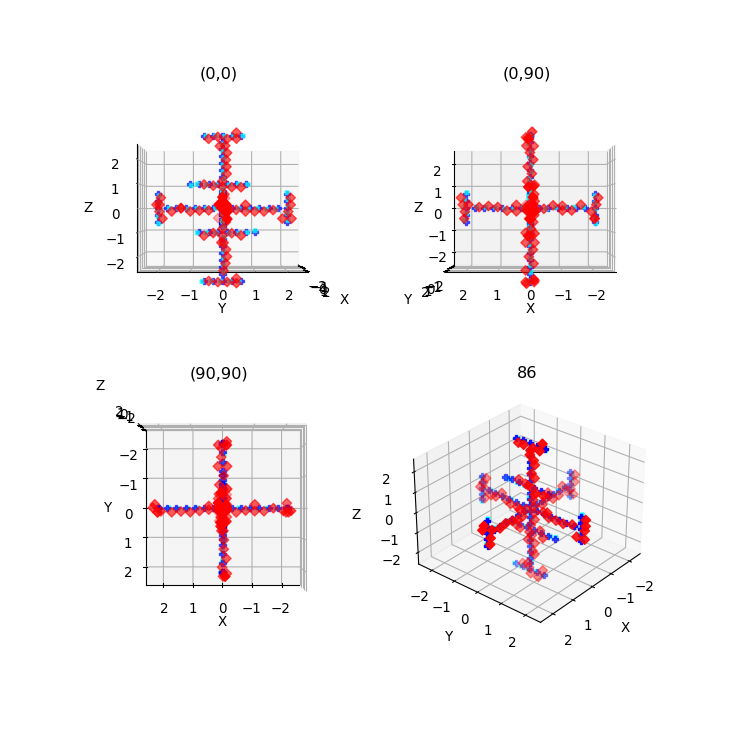

Text(0.5, 0.92, '86')

In [22]:
""" Sub-plotting charge field atoms."""
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure(figsize=(7.5,7.5))

#qklimit = 0.3  # Good for H, He
#qklimit = 1   # Good for C
#qklimit = 1.25   # Good for Mg
qklimit = 2.5   # Good for Sr

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter3D(allPXs,allPYs,allPZs, zdir='z', c='blue', cmap='Greens', marker='P',s=20);
ax.scatter3D(allNXs,allNYs,allNZs, zdir='z', c='red', cmap='Yellows', marker='D',s=25);
#ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='.',s=5);
ax.scatter3D(allEXs,allEYs,allEZs, zdir='z', c='cyan', cmap='Blues', marker='X',s=10);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0,0) #zdir='z'  vert z, horiz y
ax.set_xlim3d(-qklimit, qklimit)
ax.set_ylim3d(-qklimit, qklimit)
ax.set_zlim3d(-qklimit, qklimit)
ax.set_title('(0,0)')

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter3D(allPXs,allPYs,allPZs, c='blue', cmap='Greens', marker='P',s=20);
ax.scatter3D(allNXs,allNYs,allNZs, c='red', cmap='Yellows', marker='D',s=25);
#ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='.',s=5);
ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='X',s=10);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0,90) #zdir='z' vert z, horiz y -try to flip these 
ax.set_xlim3d(-qklimit, qklimit)
ax.set_ylim3d(-qklimit, qklimit)
ax.set_zlim3d(-qklimit, qklimit)
ax.set_title('(0,90)')

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter3D(allPXs,allPYs,allPZs, c='blue', cmap='Greens', marker='P',s=20);
ax.scatter3D(allNXs,allNYs,allNZs, c='red', cmap='Yellows', marker='D',s=25);
#ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='.',s=5);
ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='X',s=10);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(90,90) #zdir='z' vert y, horiz x
ax.set_xlim3d(-qklimit, qklimit)
ax.set_ylim3d(-qklimit, qklimit)
ax.set_zlim3d(-qklimit, qklimit)
ax.set_title('(90,90)')

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter3D(allPXs,allPYs,allPZs, c='blue', cmap='Greens', marker='P',s=20);
ax.scatter3D(allNXs,allNYs,allNZs, c='red', cmap='Yellows', marker='D',s=25);
#ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='.',s=5);
ax.scatter3D(allEXs,allEYs,allEZs, c='cyan', cmap='Blues', marker='X',s=10);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30,40) 
ax.set_xlim3d(-qklimit, qklimit)
ax.set_ylim3d(-qklimit, qklimit)
ax.set_zlim3d(-qklimit, qklimit)
ax.set_title('(30,40)')

#('.','o','s','P','X' '*','p','D','<','>','^','v'
#   '1','2','3','4','+','x','|',' ',4,5,6,7,
#   '$ $', ... )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.set_title(number)



In [23]:
import networkx as nx
import numpy as np
from networkx import Graph, DiGraph, MultiGraph, MultiDiGraph, path_graph

#  import matplotlib.pyplot as plt   # done above

"""The following is intended to build an atomic graph"""


'The following is intended to build an atomic graph'

In [24]:
"""Identify the occupied slots/numbers of protons."""

slotCounts = {} 
slots = [] 
occupied_slots = [] 
proton_total = 0   # In lieu of an atomic name or number
    
for m in range(19):
    num = m + 1
    slotk = num
    slots.append(slotk)
    slotCounts[slots[m]] = slotsetA_df.iloc[m,0]
    if slotCounts[slots[m]] >= 1 :
        occupied_slots.append(slotk)
        proton_total += slotCounts[slots[m]] 
        
"""
print('occupied_slots = ',occupied_slots)   
print('slots = ',slots)   
print('slotCounts = ',slotCounts)
print('proton_total = ',proton_total)
"""
#def make_graph(DiGraph):
#graph_label = elements[number-1]

G = nx.DiGraph()

"""  
Defining the atomic graph nodes. Create a dictionary of 
each occupied slot's node attributes, copied from slotsetA_df,
the same data from the same name dataframe slotsetA_df columns. 
This might be better solved using 'dataframe' operations or SQL.
"""

#attbr_klist = ['Protons','PX','PY','PZ','SlotOrien','SlotSpin','CanBind'] # 
# 'CanBind causes an error'??
attbr_klist = ['Atom','Protons','PX','PY','PZ','SlotOrien','SlotSpin']
# Why doesn't 'Atom' appear in the yFiles attrib list?

for j in range(len(occupied_slots)) :
    
    slnum = occupied_slots[j] # 1-19 proton_total
    attbr_vlist = []
    attbr_vlist.append(proton_total)
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,0])
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,1])
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,2])
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,3])
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,70])
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,71])
    attbr_vlist.append(slotsetA_df.iloc[slnum-1,72])

    dname = str('d'+str(slnum))
    dname = {}    
    dname = dict(zip(attbr_klist,attbr_vlist))
    #print(dname)
    
    if slnum == 1 : 
        G.add_node(1,**dname)
    if slnum == 2 : 
        G.add_node(2,**dname)
        G.add_edge(1, 2)
        G.add_edge(2, 1)        
    if slnum == 3 : 
        G.add_node(3,**dname)
        G.add_edge(1, 3)
        G.add_edge(3, 1)
    if slnum == 4 : 
        G.add_node(4,**dname)
        G.add_edge(2, 4)
        G.add_edge(4, 2)
    if slnum == 5 : 
        G.add_node(5,**dname)
        G.add_edge(3, 5)
        G.add_edge(5, 3)
    if slnum == 6 : 
        G.add_node(6,**dname)
        G.add_edge(1, 6)
        G.add_edge(6, 1)
    if slnum == 7 : 
        G.add_node(7,**dname)
        G.add_edge(1, 7)
        G.add_edge(7, 1)
    if slnum == 8 : 
        G.add_node(8,**dname)
        G.add_edge(1, 8)
        G.add_edge(8, 1)
    if slnum == 9 : 
        G.add_node(9,**dname)
        G.add_edge(1, 9)
        G.add_edge(9, 1)
    if slnum == 10 : 
        G.add_node(10,**dname)
        G.add_edge(10, 6)
        G.add_edge(6, 10)
    if slnum == 11 : 
        G.add_node(11,**dname)
        G.add_edge(8, 11)
        G.add_edge(11, 8)
    if slnum == 12 : 
        G.add_node(12,**dname)
        G.add_edge(7, 12)
        G.add_edge(12, 7)
    if slnum == 13 : 
        G.add_node(13,**dname)
        G.add_edge(9, 13)
        G.add_edge(13, 9)
    if slnum == 14 : 
        G.add_node(14,**dname)
        G.add_edge(4, 14)
        G.add_edge(14, 4)
    if slnum == 15 : 
        G.add_node(15,**dname)
        G.add_edge(5, 15)
        G.add_edge(15, 5)
    if slnum == 16 : 
        G.add_node(16,**d16)
        G.add_edge(2, 16)
        G.add_edge(16, 2)
    if slnum == 17 : 
        G.add_node(17,**dname)
        G.add_edge(3, 17)
        G.add_edge(17, 3)
    if slnum == 18 : 
        G.add_node(18,**dname)
        G.add_edge(2, 18)
        G.add_edge(18, 2)
    if slnum == 19 : 
        G.add_node(19,**dname)
        G.add_edge(3, 19)
        G.add_edge(19, 3)   


<IPython.core.display.Javascript object>


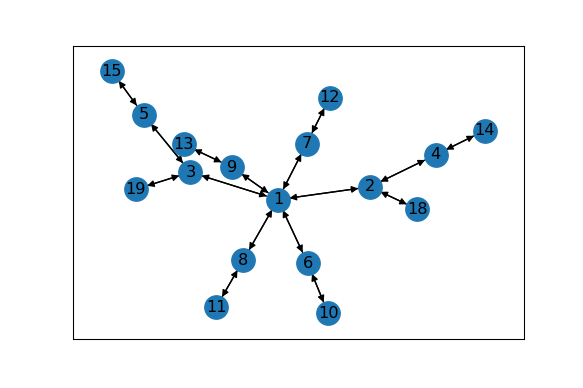

In [25]:
%matplotlib notebook
#nx.draw(G)

nx.draw_networkx(G)
#nx.draw_networkx(G, node_color=color_map, with_labels=True)

plt.show()


In [26]:
"""Execute in jupyter notebook or jupyter lab"""
from yfiles_jupyter_graphs import GraphWidget
# shows empty widget

GraphWidget(graph = G)

#GraphWidget(graph = make_graph(DiGraph))


GraphWidget(layout=Layout(height='500px', width='100%'))


Charge Field physics and the Unified Field theory, (and much more) have been well developed and well described by Miles Mathis. See,

***THE GREATEST STANDING ERRORS IN PHYSICS AND MATHEMATICS***
<http://milesmathis.com/index.html>
[Miles Mathis science site Homepage](http://milesmathis.com/index.html).

**SECTION 9: THE NUCLEUS** contains descriptions and diagrams 
of charge channeling and charge recycling by the 
elements. A paper most relevant to Atom Builder is 
>**How to Build the Elements**. 
>Explaining the periodic table, with nuclear diagrams".  
<http://milesmathis.com/nuclear.pdf>
[How to Build the Elements](http://milesmathis.com/nuclear.pdf)
For Charge Field discussion visit the forum at "Miles Mathis' Charge Field - Portal" https://milesmathis.forumotion.com.

This particular project is described in the Miles Periodic Table with Standard Periodic Table reference thread, https://milesmathis.forumotion.com/t634p75-miles-periodic-table-with-standard-periodic-table-reference#6702.

This project was Cr6's idea. He's also responsible for following Miles Mathis' atomic model and creating the Slotlayout diagram this project greatly relies.

There's at least one 10 year old charge field "Atom Viewer" out there, Nevyn's object oriented, way sophisticated javaScript code. I'll try to figure it out.

Please pardon my understandings, personal interpretations and mistakes. Feel free to make this project better.